# Project: Decision Tree ML Techniques to Predict Loan Aquisition

**Peyton LaBauve**

**June 21st, 2024**

### Objective
The purpose of this project is to predict whether a client of a financial institution will take out a personal loan, to determine which customer attributes are most significant in driving purchases, and to identify which segment of customers to target via decision tree machine learning techniques.

### Data Dictionary
* `ID`: Customer ID
* `Age`: Customer’s age in completed years
* `Experience`: #years of professional experience
* `Income`: Annual income of the customer (in thousand dollars)
* `ZIP Code`: Home Address ZIP code.
* `Family`: the Family size of the customer
* `CCAvg`: Average spending on credit cards per month (in thousand dollars)
* `Education`: Education Level. 1: Undergrad; 2: Graduate;3: Advanced/Professional
* `Mortgage`: Value of house mortgage if any. (in thousand dollars)
* `Personal_Loan`: Did this customer accept the personal loan offered in the last campaign? (0: No, 1: Yes)
* `Securities_Account`: Does the customer have securities account with the bank? (0: No, 1: Yes)
* `CD_Account`: Does the customer have a certificate of deposit (CD) account with the bank? (0: No, 1: Yes)
* `Online`: Do customers use internet banking facilities? (0: No, 1: Yes)
* `CreditCard`: Does the customer use a credit card issued by any other Bank (excluding All life Bank)? (0: No, 1: Yes)

## Loading Libraries

In [1]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.model_selection import GridSearchCV
import scipy.stats as stats
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    ConfusionMatrixDisplay,
    make_scorer,
)
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", 200)

## Loading Data

In [2]:
df = pd.read_csv("Loan_Modelling.csv")

In [3]:
data = df.copy()

## Overview of the Data

In [4]:
data.head(6)

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1
5,6,37,13,29,92121,4,0.4,2,155,0,0,0,1,0


In [5]:
data.tail(6)

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
4994,4995,64,40,75,94588,3,2.0,3,0,0,0,0,1,0
4995,4996,29,3,40,92697,1,1.9,3,0,0,0,0,1,0
4996,4997,30,4,15,92037,4,0.4,1,85,0,0,0,1,0
4997,4998,63,39,24,93023,2,0.3,3,0,0,0,0,0,0
4998,4999,65,40,49,90034,3,0.5,2,0,0,0,0,1,0
4999,5000,28,4,83,92612,3,0.8,1,0,0,0,0,1,1


In [6]:
data.shape

(5000, 14)

The dataset has 5000 rows and 8 columns of data.

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIPCode             5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal_Loan       5000 non-null   int64  
 10  Securities_Account  5000 non-null   int64  
 11  CD_Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


Observations

In [8]:
data.describe(include='all').T

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIPCode,5000.0,93169.257000,1759.455086,90005.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
Personal_Loan,5000.0,0.096000,0.294621,0.0,0.00,0.0,0.00,1.0


Observations:
* The values in the Experience column range from -3 to 43. Considering that you cannot have negative experience within the context of this dataset, anomolous values in the Experience column will have to be corrected for.
* The zip codes in the data set range from 90005 to 96651. These are all California codes. To increase the generalization of our models we can likely just use the first 2-3 digits of each zipcode which correspond to state and city.

In [9]:
data["ID"].nunique()

5000

Since all of the values in ID are unique we can drop the ID column.

In [10]:
data.drop(["ID"], axis=1, inplace=True)

In [11]:
data.duplicated().sum()

0

There are no duplicated values in the dataset.

In [12]:
data.isnull().sum()

Age                   0
Experience            0
Income                0
ZIPCode               0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal_Loan         0
Securities_Account    0
CD_Account            0
Online                0
CreditCard            0
dtype: int64

There are no missing values in the dataset.

## Data Preprocessing (1 of 2)

In [13]:
data["Age"].unique()

array([25, 45, 39, 35, 37, 53, 50, 34, 65, 29, 48, 59, 67, 60, 38, 42, 46,
       55, 56, 57, 44, 36, 43, 40, 30, 31, 51, 32, 61, 41, 28, 49, 47, 62,
       58, 54, 33, 27, 66, 24, 52, 26, 64, 63, 23])

In [14]:
data["Experience"].unique()

array([ 1, 19, 15,  9,  8, 13, 27, 24, 10, 39,  5, 23, 32, 41, 30, 14, 18,
       21, 28, 31, 11, 16, 20, 35,  6, 25,  7, 12, 26, 37, 17,  2, 36, 29,
        3, 22, -1, 34,  0, 38, 40, 33,  4, -2, 42, -3, 43])

In [15]:
data[data["Experience"] < 0]["Experience"].unique()

array([-1, -2, -3])

In [16]:
data["Experience"].replace({-1: 1, -2: 2, -3: 3}, inplace=True)

In [17]:
data["Experience"].unique()

array([ 1, 19, 15,  9,  8, 13, 27, 24, 10, 39,  5, 23, 32, 41, 30, 14, 18,
       21, 28, 31, 11, 16, 20, 35,  6, 25,  7, 12, 26, 37, 17,  2, 36, 29,
        3, 22, 34,  0, 38, 40, 33,  4, 42, 43])

The anonmolous values have been treated successfully.

In [18]:
data["ZIPCode"].nunique()

467

In [19]:
data["ZIPCode"] = data["ZIPCode"].astype(str)
data["ZIPCode"].str[0:3].nunique()

57

In [20]:
data["ZIPCode"] = data["ZIPCode"].astype(str)
data["ZIPCode"].str[0:2].nunique()

7

We can simplify the data in ZIPCode by only using the first 2-3 digits of each zip code which generally represent the state, region, and city corresponding to a given code. For the models we will create for this analysis, using only the first 2 digits of each zip code, representing regions of California, will produce a more generalized model. If we want a more complex model that groups individuals by city, we could produce a separate analysis that uses the first 3 digits of each zip code. For the purpose of visualization, 7 regions are also easier to process and visualize than 57 cities within the context of this data set. As such, for this analysis, the first two digits of each zip code in ZIPCode will be utilized.

In [21]:
data["ZIPCode"] = data["ZIPCode"].str[0:2]

In [22]:
data["ZIPCode"].unique()

array(['91', '90', '94', '92', '93', '95', '96'], dtype=object)

Because Zip codes are identifiers and cannot be used mathematically, we can convert them and other categorical columns to the category data type.

In [23]:
category_columns = ["Education", "Personal_Loan", "Securities_Account", "CD_Account", "Online", "CreditCard", "ZIPCode"]
data[category_columns] = data[category_columns].astype("category")

In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   Age                 5000 non-null   int64   
 1   Experience          5000 non-null   int64   
 2   Income              5000 non-null   int64   
 3   ZIPCode             5000 non-null   category
 4   Family              5000 non-null   int64   
 5   CCAvg               5000 non-null   float64 
 6   Education           5000 non-null   category
 7   Mortgage            5000 non-null   int64   
 8   Personal_Loan       5000 non-null   category
 9   Securities_Account  5000 non-null   category
 10  CD_Account          5000 non-null   category
 11  Online              5000 non-null   category
 12  CreditCard          5000 non-null   category
dtypes: category(7), float64(1), int64(5)
memory usage: 269.8 KB


## Exploratory Data Analysis (EDA)

### Univariate Analysis

#### Univariate Visualization Functions

In [25]:
def labeled_barplot(data, feature, perc=False, n=None):
    total = len(data[feature])
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 2, 6))
    else:
        plt.figure(figsize=(n + 2, 6))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),)

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total)
        else:
            label = p.get_height()

        x = p.get_x() + p.get_width() / 2
        y = p.get_height()

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",)

    plt.show()

In [26]:
def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,
        sharex=True,
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,)
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet")
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2)
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--")
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-")

#### Observations and Analysis

**Age**

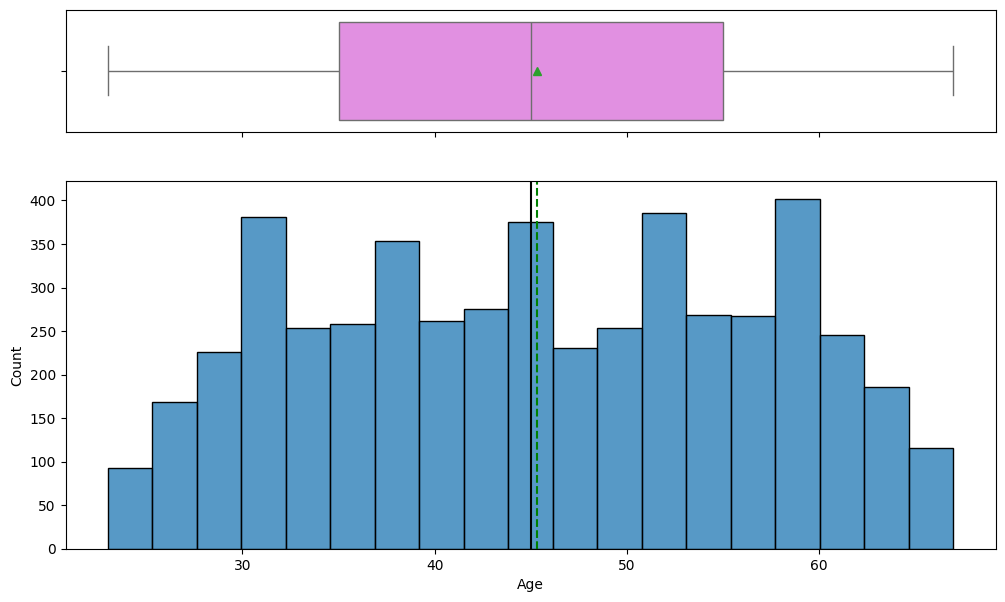

In [27]:
histogram_boxplot(data, "Age")

In [28]:
data['Age'].median()

45.0

Observations:
* The Age data follows a normal distribution with 5 peaks.
* The median age in the data set is about 45 years old

**Experience**

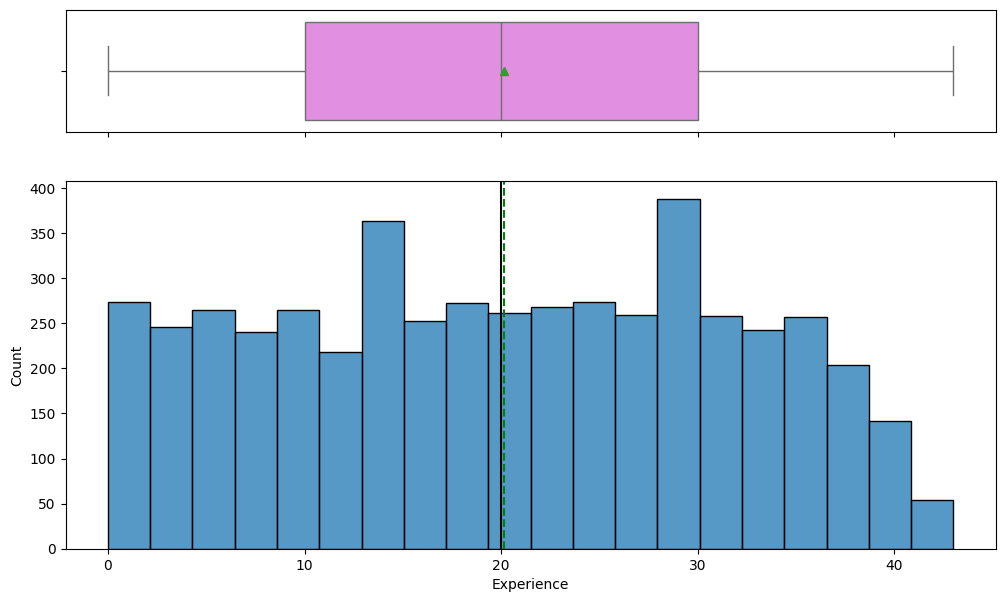

In [29]:
histogram_boxplot(data, "Experience", bins=20)

In [30]:
data["Experience"].mean()

20.1346

Observations:
* The histogram for Experience is somewhat right skewed.
* The average experience represented in the dataset is about 20 years.

**Income**

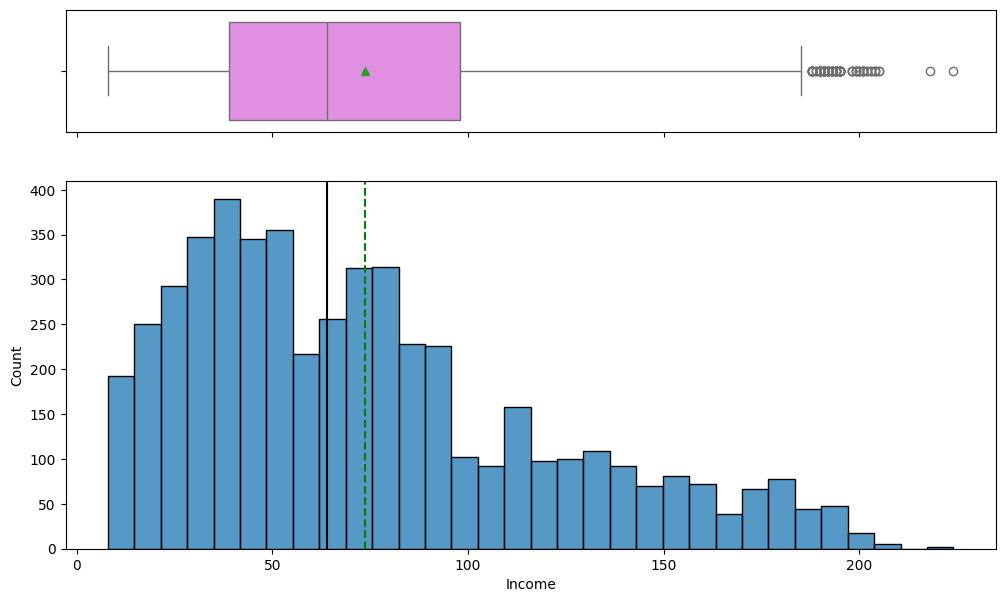

In [31]:
histogram_boxplot(data, "Income")

In [32]:
data['Income'].mean()

73.7742

In [33]:
data['Income'].median()

64.0

Observations:
* The histogram for income right skewed.
* The mean income in the data is 73,000 dollars while the median income is 64,000 dollars.

**Zip Code**

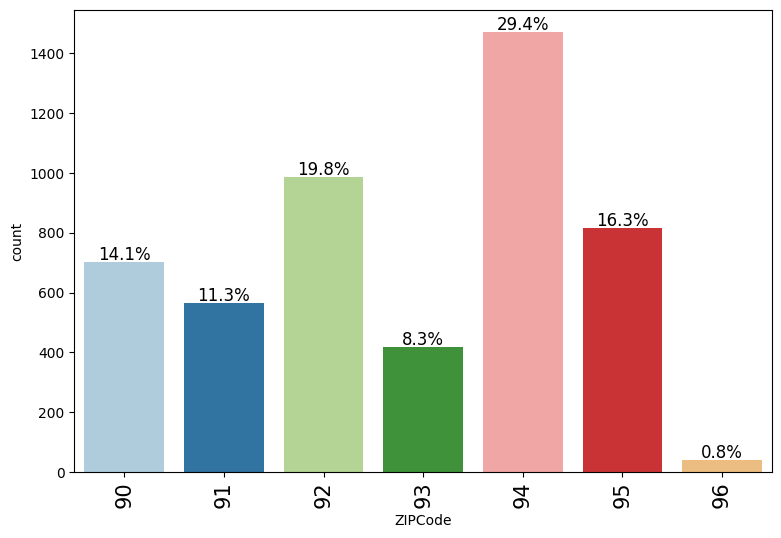

In [34]:
labeled_barplot(data, "ZIPCode", perc=True)

Observations:
* The region with the most values (29.4%) from the data set is region 94 which contains the cities, San Francisco, Sacramento, Oakland, and North Bay.
* The region with the least values from the data set is region 96 which corresponds mostly to bases in the Pacific as well as Hawaii and an assortment of islands in the region.

**Family Size**

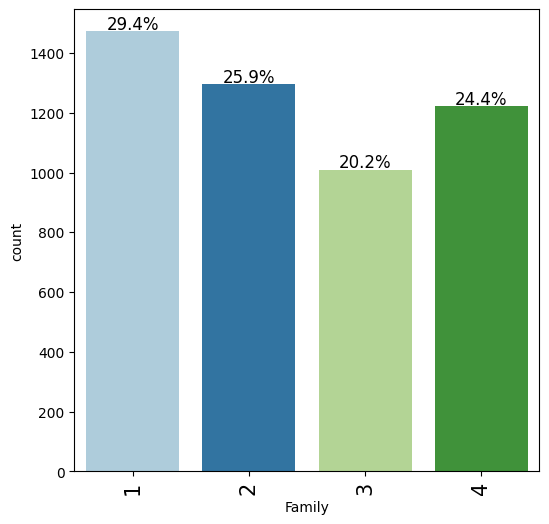

In [35]:
labeled_barplot(data, "Family", perc=True)

Observations:
* Individuals were the most represented in the data set followed by families of two.

**Average Spend on Credit Cards per Month**

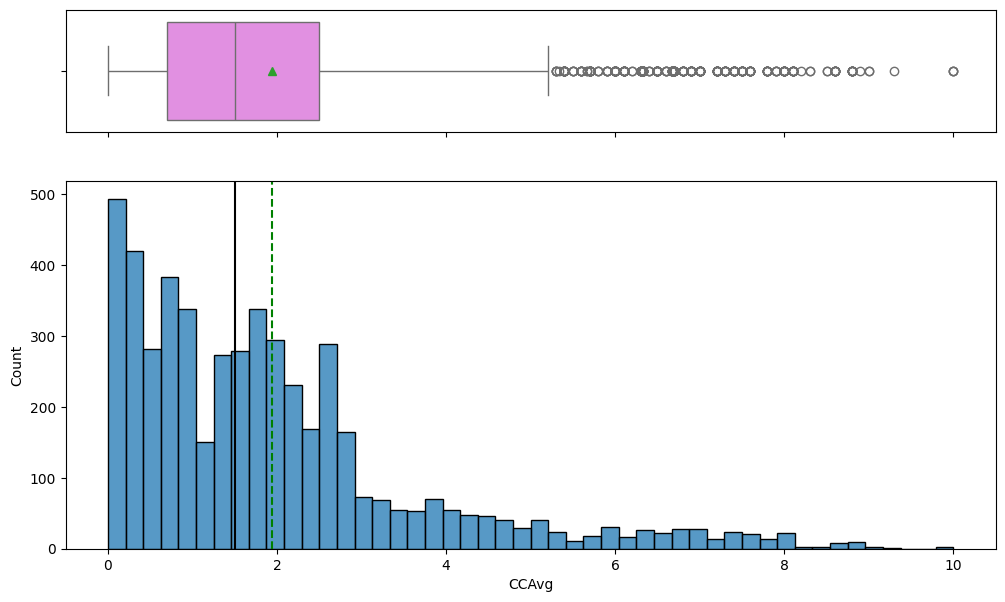

In [36]:
histogram_boxplot(data, "CCAvg")

In [37]:
data['CCAvg'].mean()

1.9379380000000002

In [38]:
data["CCAvg"].value_counts().head(20)

CCAvg
0.3    241
1.0    231
0.2    204
2.0    188
0.8    187
0.1    183
0.4    179
1.5    178
0.7    169
0.5    163
1.7    158
1.8    152
1.4    136
2.2    130
1.3    128
0.6    118
2.8    110
2.5    107
0.9    106
0.0    106
Name: count, dtype: int64

Observations:
* The data for average spend on credit cards is right skewed with numerous outliers.
*The average credit card debt held by an individual in the data set was $1,930.
* 106 individuals in the data set had no average credit card spend.

**Education Level**

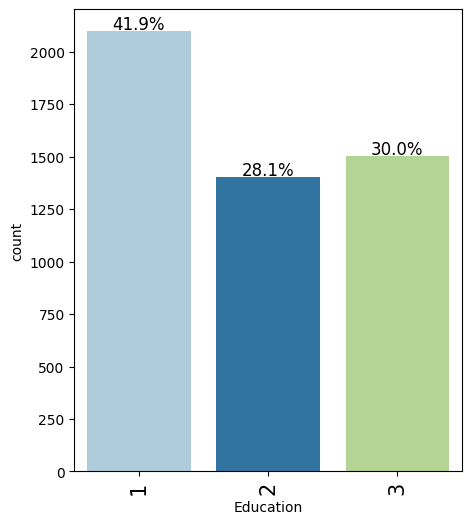

In [39]:
labeled_barplot(data, "Education", perc=True)

Observations:
* The most represented education level in the data set is undergrad.

**Mortgage**

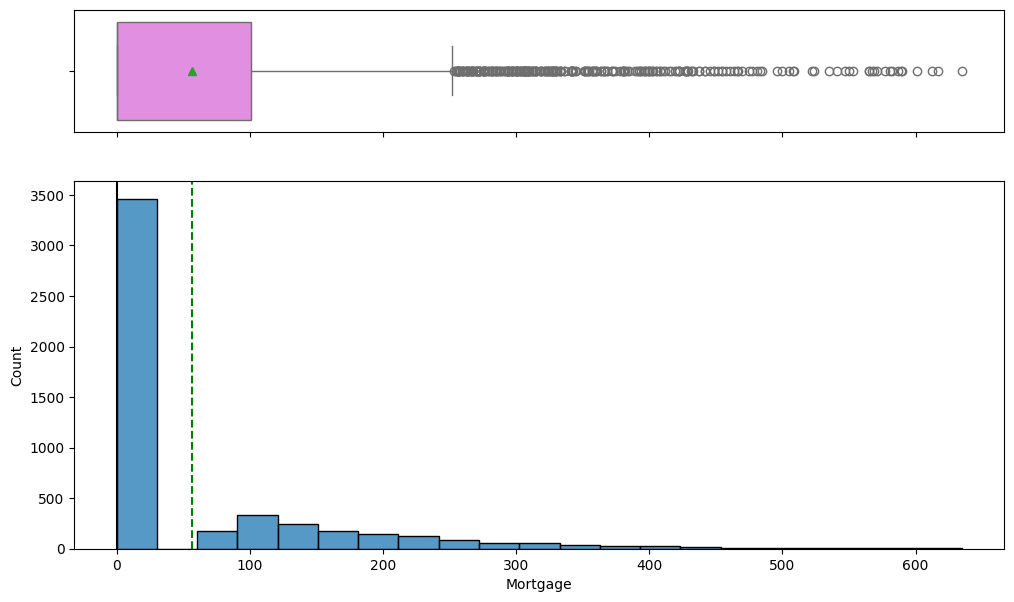

In [40]:
histogram_boxplot(data, "Mortgage", bins=21)

In [41]:
data["Mortgage"].mean()

56.4988

In [42]:
data["Mortgage"].value_counts()

Mortgage
0      3462
98       17
119      16
89       16
91       16
       ... 
547       1
458       1
505       1
361       1
541       1
Name: count, Length: 347, dtype: int64

In [43]:
data["Mortgage"].value_counts(normalize=True)

Mortgage
0      0.6924
98     0.0034
119    0.0032
89     0.0032
91     0.0032
        ...  
547    0.0002
458    0.0002
505    0.0002
361    0.0002
541    0.0002
Name: proportion, Length: 347, dtype: float64

Observations:
* About 70% of the individuals represented in the data set have no mortgage whatsoever.
* The mortgage curve is right skewed with numerous outliers

**Whether the customer accepted a Personal Loan offered in last campaign**


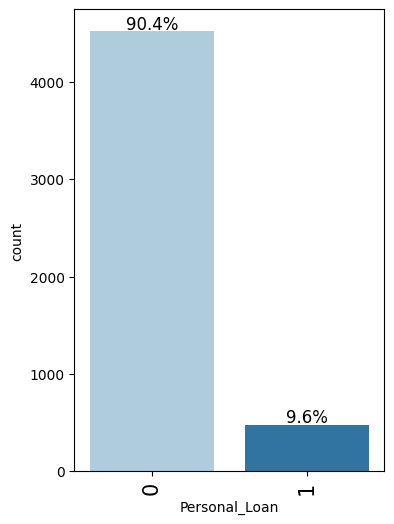

In [44]:
labeled_barplot(data, "Personal_Loan", perc=True)

Observations:
* 90% of customers in the data set did not accept a personal loan offered in the last campaign

**Whether the customer has a Securities Account with the bank**

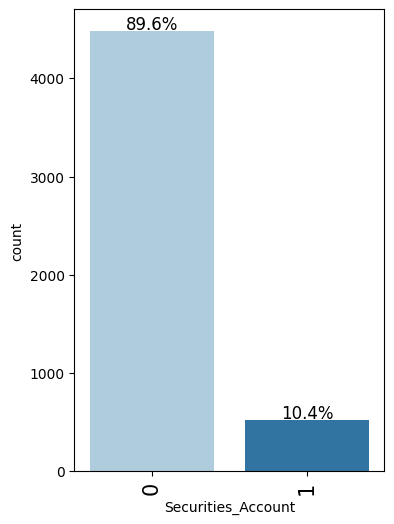

In [45]:
labeled_barplot(data, "Securities_Account", perc=True)

Observations:
* 89.6% of customers do not have a Securities Account

**Whether the customer has a Certificate of Deposit (CD) account with the bank**

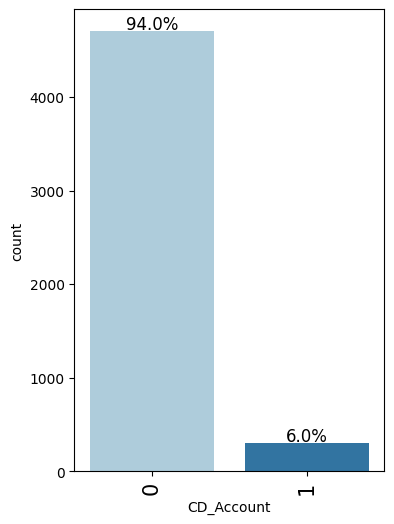

In [46]:
labeled_barplot(data, "CD_Account", perc=True)

Observations:
* Only 6% of customers have a CD Account.


**Whether the customer uses Online banking**

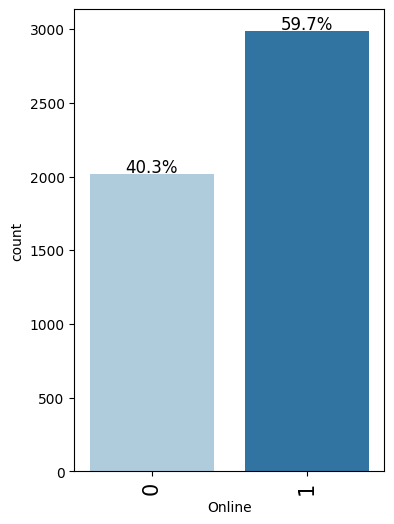

In [47]:
labeled_barplot(data, "Online", perc=True)

Observations:
* 59.7% of the individuals represented in the data set do use online banking.

**Whether the customer uses a credit card issued by any other Bank (excluding All Life Bank)**

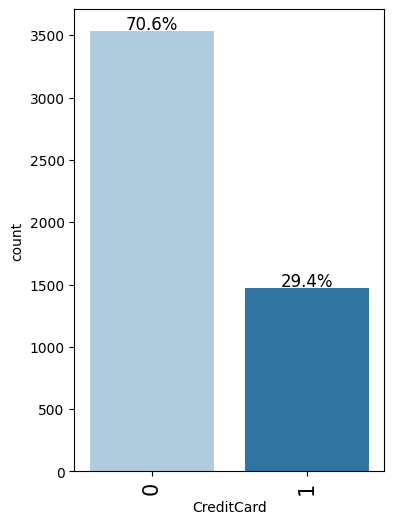

In [48]:
labeled_barplot(data, "CreditCard", perc=True)

In [49]:
data["CreditCard"].value_counts()

CreditCard
0    3530
1    1470
Name: count, dtype: int64

Observations:
* 1470 individuals, or about 29.4% of individuals in the data set, had credit cards with other banks.

### Bivariate Analysis

#### Bivariate Visualization Functions

In [50]:
def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 5, 5))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

In [51]:
def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="skyblue",
        stat="density",)

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="lightcoral",
        stat="density",)

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="Blues")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="Blues",)

    plt.tight_layout()
    plt.show()

#### Observations and Analysis

**Correlation Check**

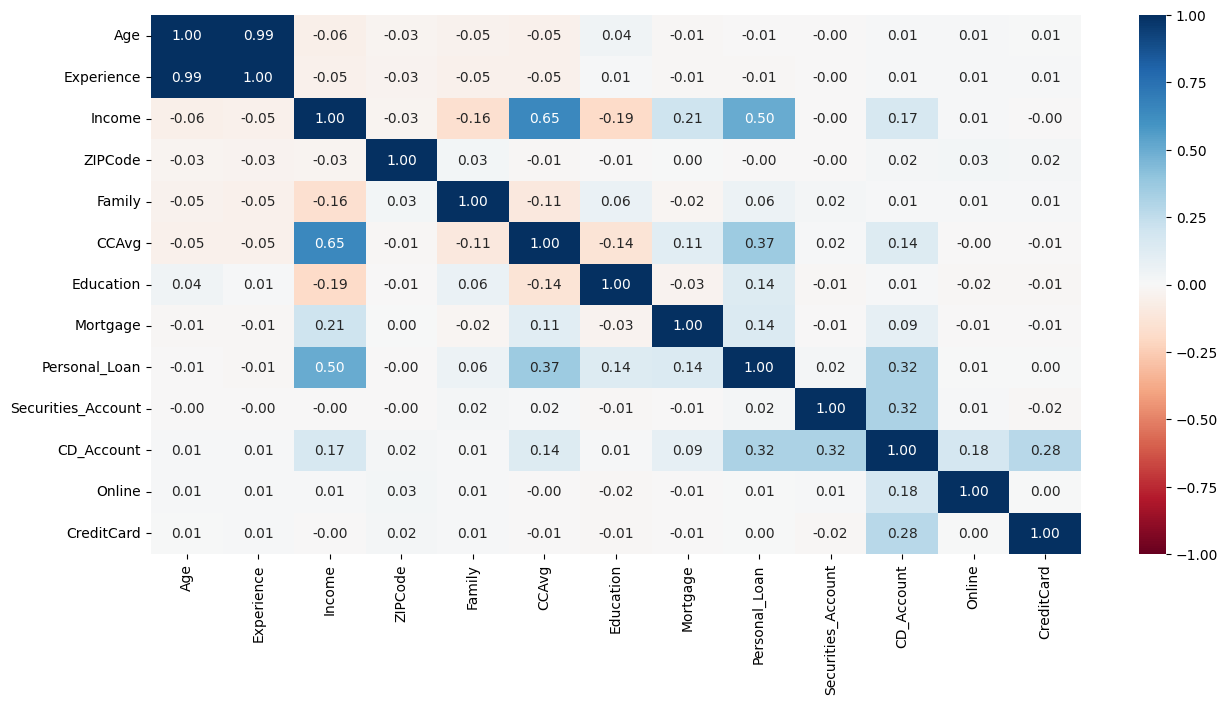

In [52]:
plt.figure(figsize=(15, 7))
sns.heatmap(data.corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="RdBu")
plt.show()

Observations:
* Age and Experience are almost perfectly correlated.
* There is a strong correlation between Credit Card Average and Income.
* There is a correlation between an individuals income and whether they take a personal loan.
* There is a slight correlation between having a CD Account and taking a personal loan or having a securities account.

**Personal Loan vs. Age**

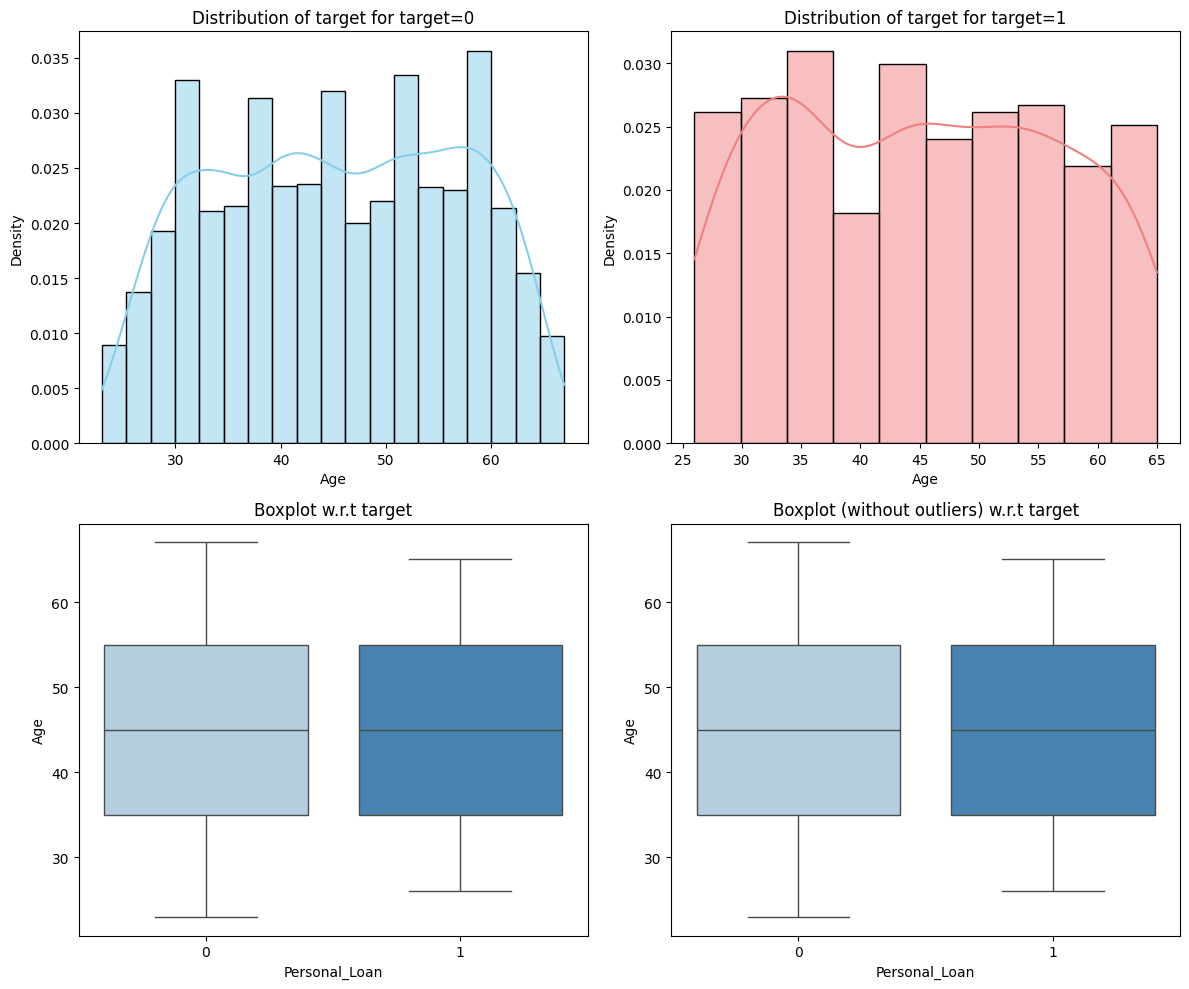

In [53]:
distribution_plot_wrt_target(data, "Age", "Personal_Loan")

Observations:
* Less individuals who were 40 took a personal loan compared to individuals at other ages.

**Personal Loan vs. Experience**

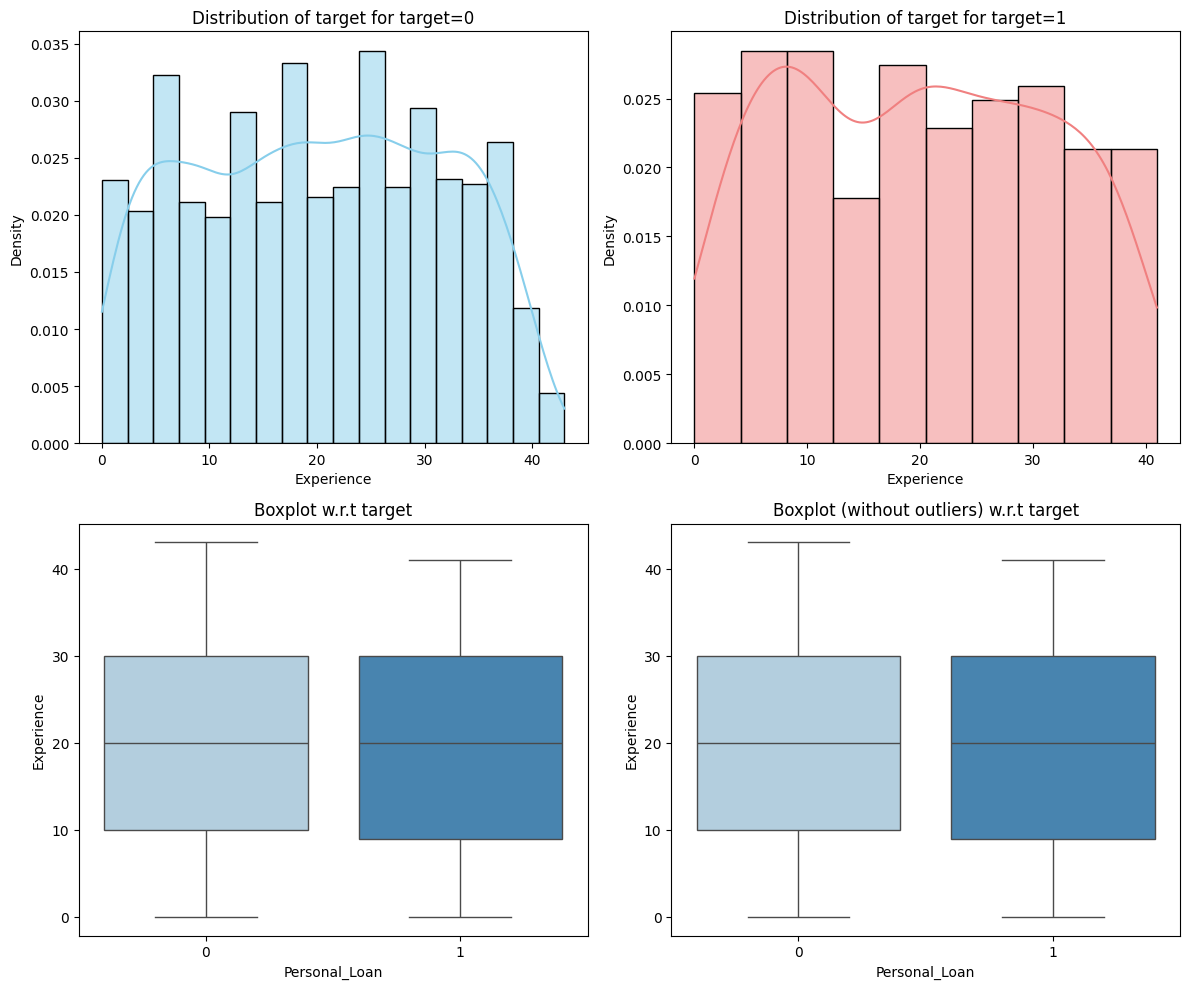

In [54]:
distribution_plot_wrt_target(data, "Experience", "Personal_Loan")

Observations:

* There is not a significant difference in experience for those who took a loan vs. those who did not.

**Personal Loan vs. Income**

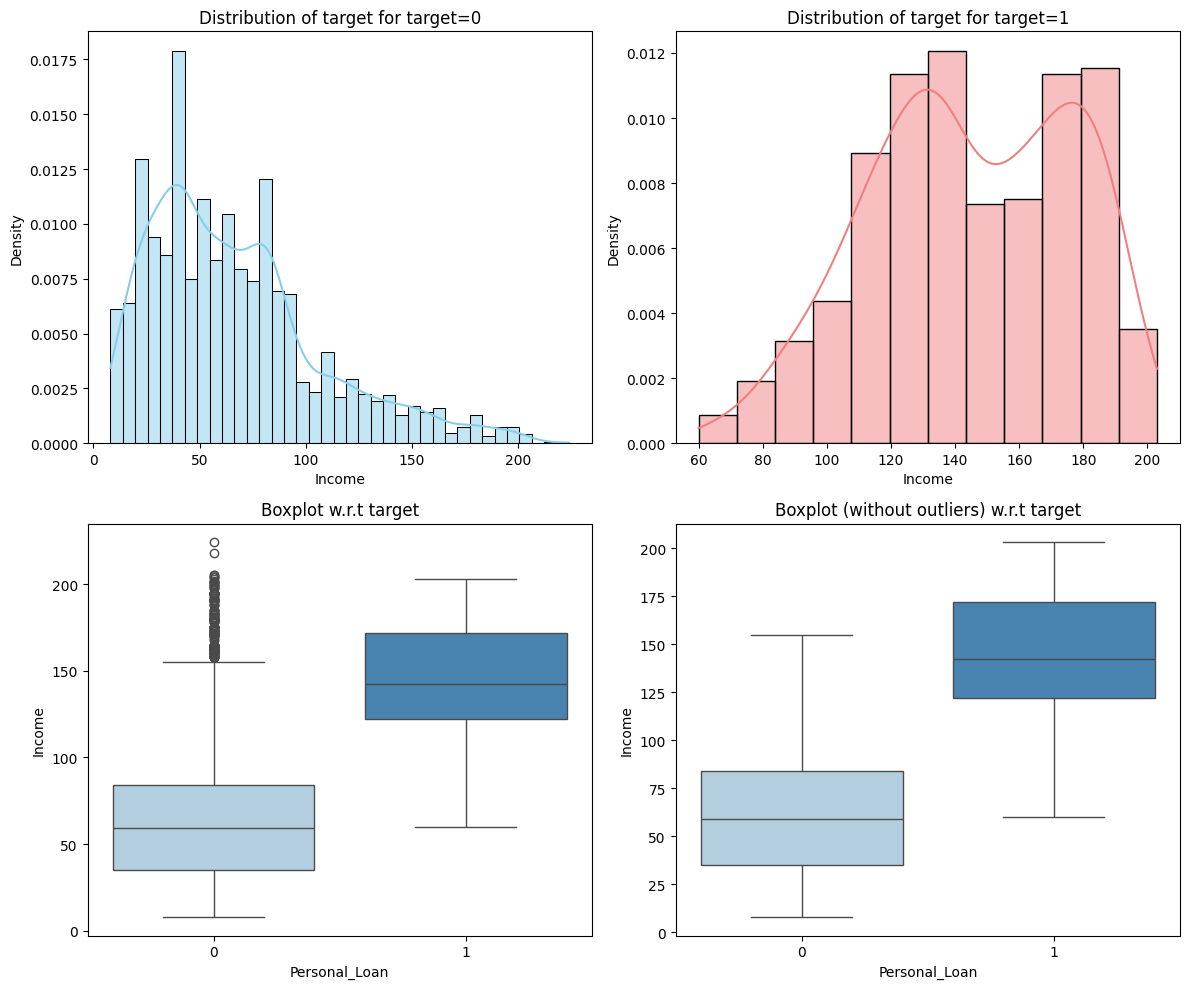

In [55]:
distribution_plot_wrt_target(data, "Income", "Personal_Loan")

Observations:
* The income curve for those who did not take a loan is right skwewed while the income curve for those who did take a loan is left skewed.
* Those who took out loans had higher incomes on average.

**Personal Loan vs. Zip Code**

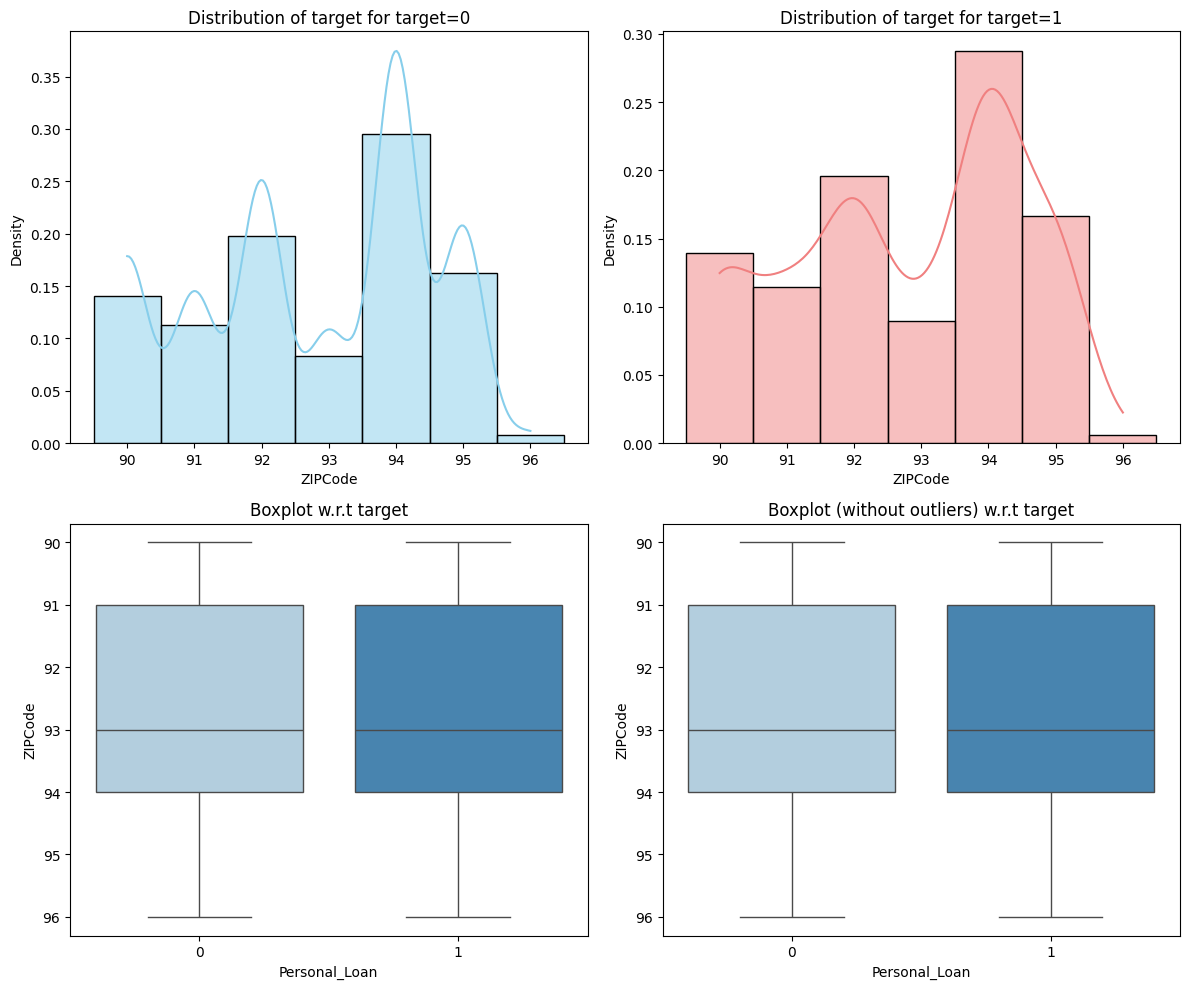

In [56]:
distribution_plot_wrt_target(data, "ZIPCode", "Personal_Loan")

Observations:
* An individuals zipcode did not significantly impact whether or not they took out a loan.

**Personal Loan vs. Family Size**

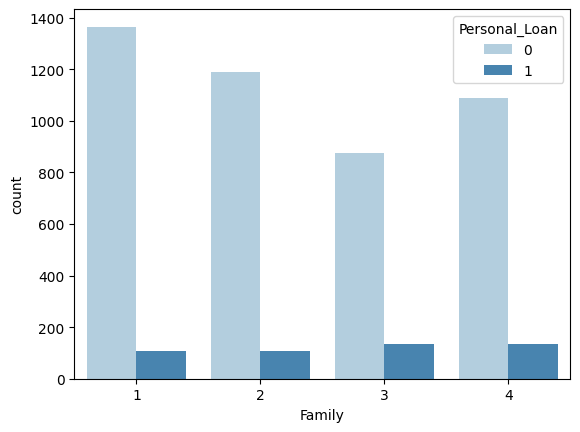

In [57]:
sns.countplot(data=data, x="Family", hue="Personal_Loan", palette='Blues');

Personal_Loan     0    1   All
Family                        
All            4520  480  5000
4              1088  134  1222
3               877  133  1010
1              1365  107  1472
2              1190  106  1296
------------------------------------------------------------------------------------------------------------------------


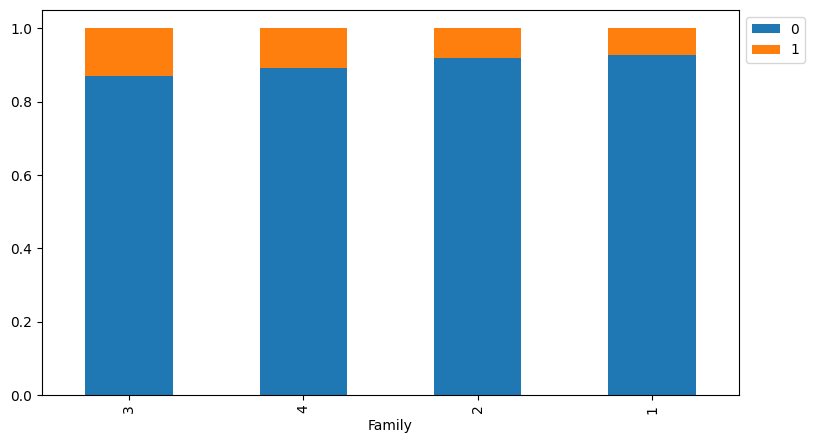

In [58]:
stacked_barplot(data, "Family", "Personal_Loan")

Observations:
* Families that had 3-4 members took out more loans than those that had 1-2 members only.

**Personal Loan vs. Average Credit Card Spend per Month**

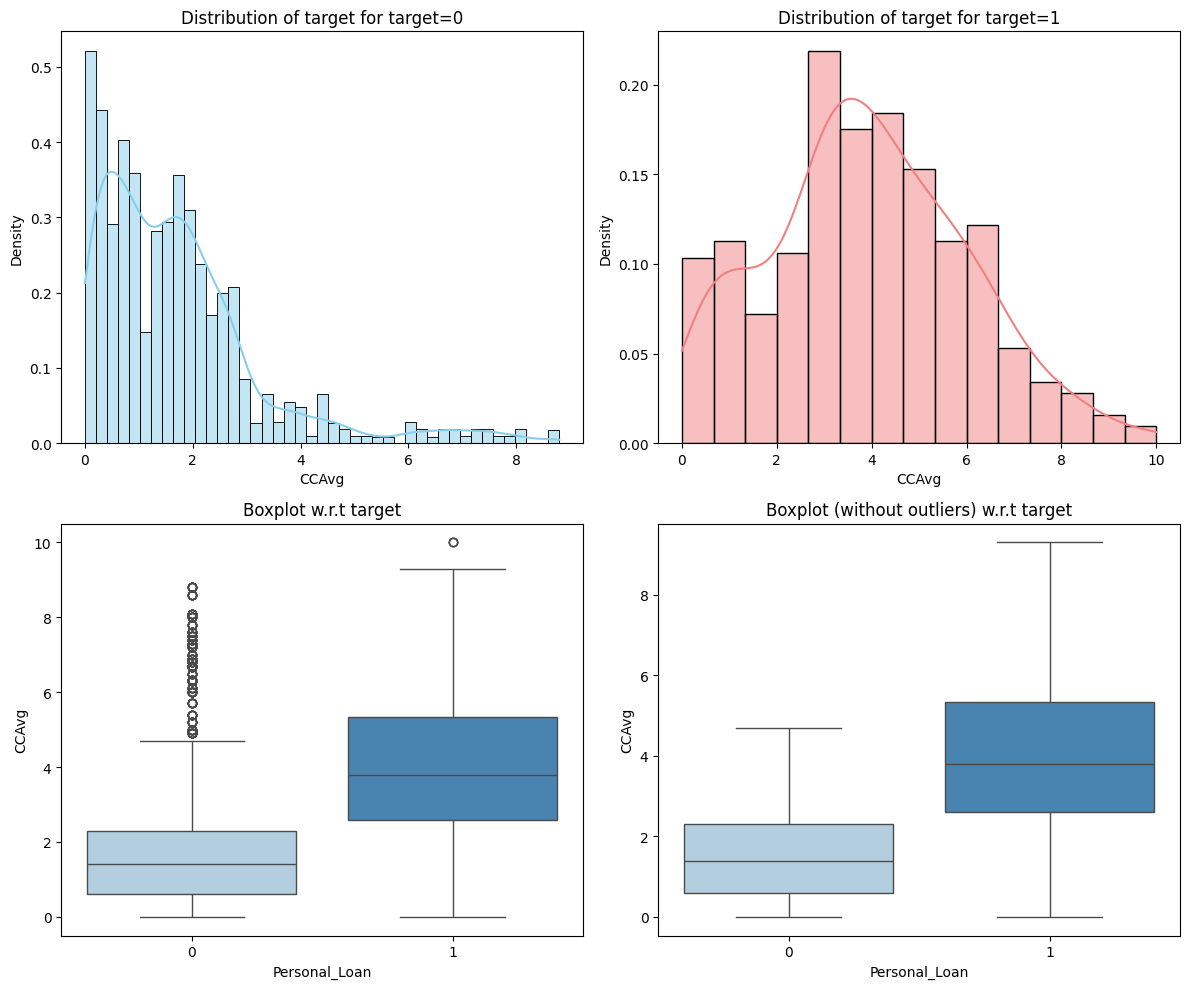

In [59]:
distribution_plot_wrt_target(data, "CCAvg", "Personal_Loan")

Observations:
* Average credit card spend was right skewed for both individuals who did not take out a loan and for individuals who did take out a loan.
* Individuals who did take out a loan on average had more credit card debt than those who did not.

**Personal Loan vs. Education Level**

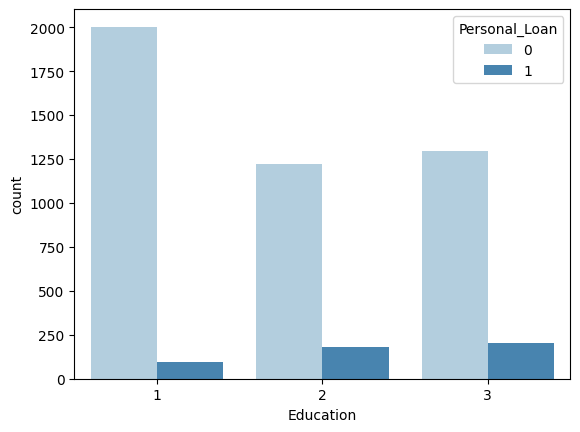

In [60]:
sns.countplot(data=data, x="Education", hue="Personal_Loan", palette='Blues');

Personal_Loan     0    1   All
Education                     
All            4520  480  5000
3              1296  205  1501
2              1221  182  1403
1              2003   93  2096
------------------------------------------------------------------------------------------------------------------------


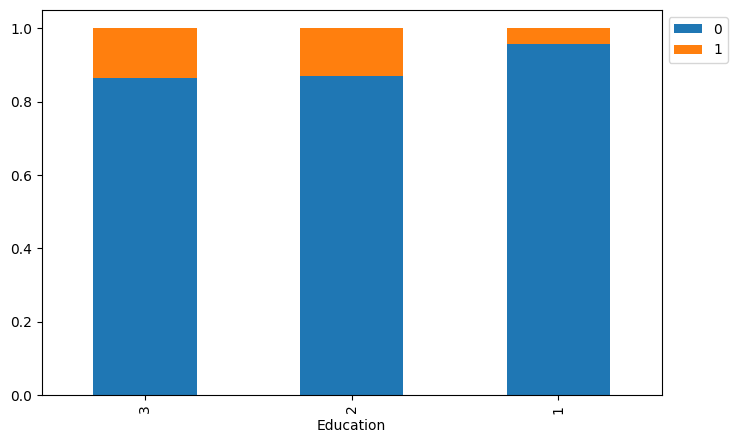

In [61]:
stacked_barplot(data, "Education", "Personal_Loan")

Observations:
* Individuals with a graduate or professional degree were more likley to take out a personal loan than those with only undergraduate education.

**Personal Loan vs. Mortgage**

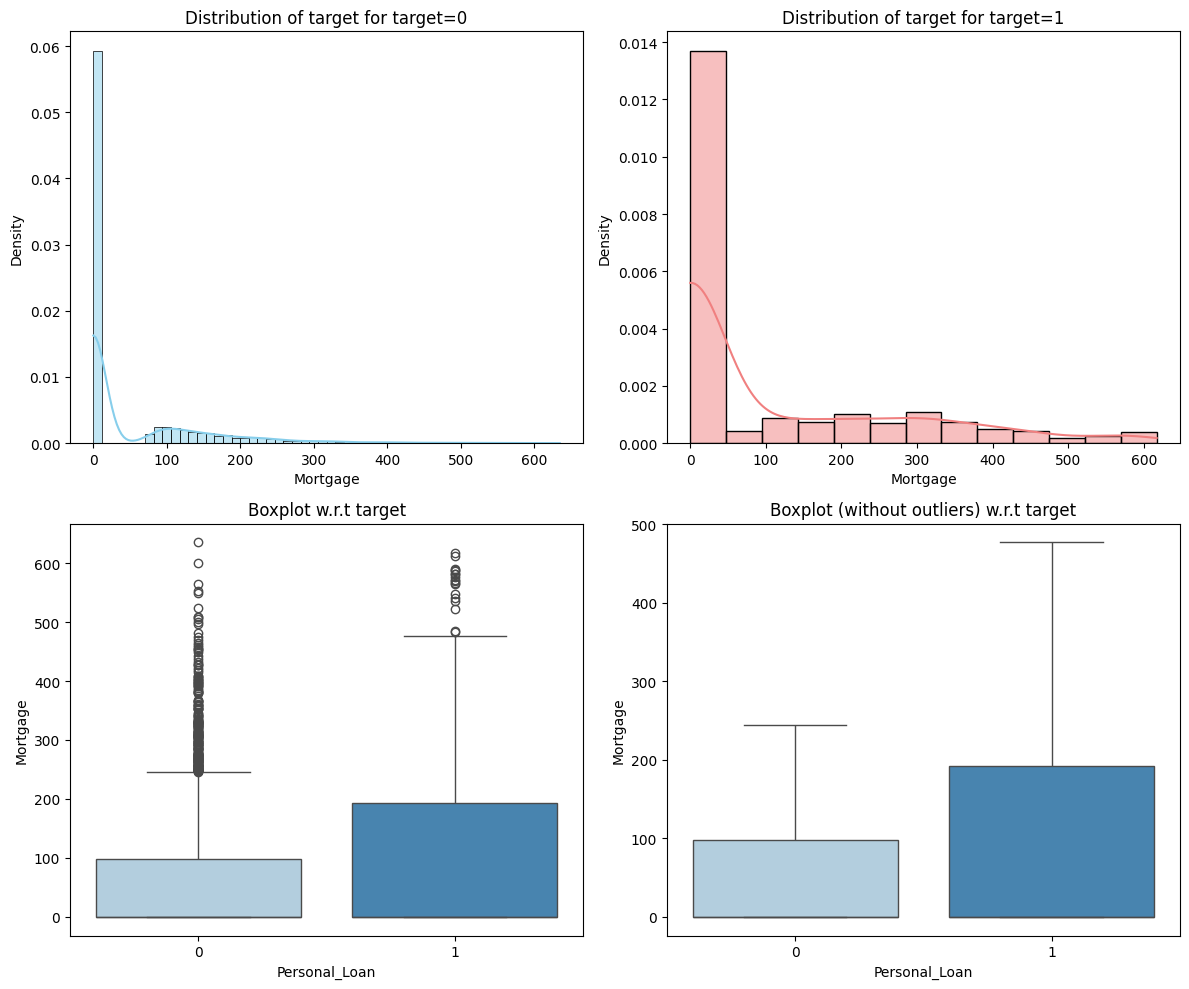

In [62]:
distribution_plot_wrt_target(data, "Mortgage", "Personal_Loan")

Observations:

* The curve for mortgages are heavily right skewed for both individuals who did take out a loan and for those who did not.
* On average individuals who did take out a loan also had higher mortgages.

**Personal Loan vs. Securities Account with Bank**

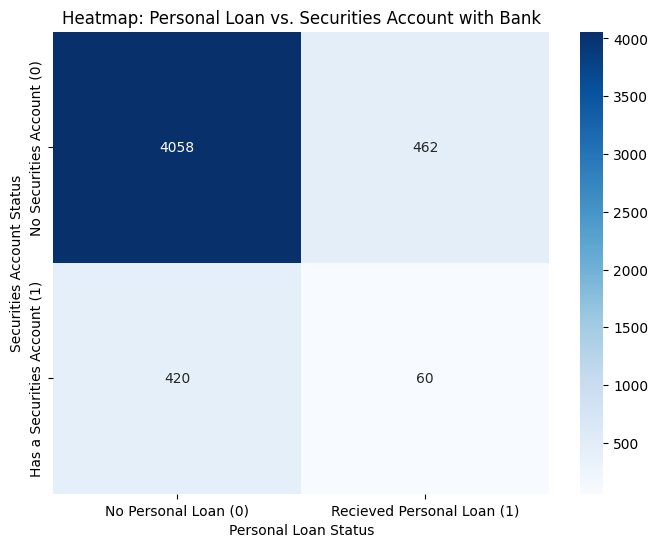

In [63]:
x = data["Securities_Account"]
y = data["Personal_Loan"]
cm = confusion_matrix(y, x)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Personal Loan (0)', 'Recieved Personal Loan (1)'], yticklabels=['No Securities Account (0)', 'Has a Securities Account (1)'])
plt.xlabel('Personal Loan Status')
plt.ylabel('Securities Account Status')
plt.title('Heatmap: Personal Loan vs. Securities Account with Bank')
plt.show()

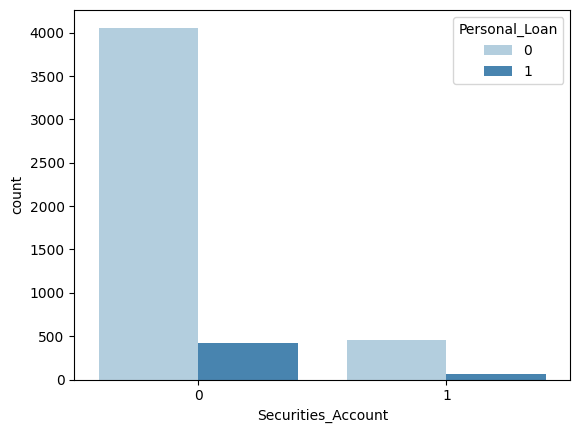

In [64]:
sns.countplot(data=data, x="Securities_Account", hue="Personal_Loan", palette='Blues');

Personal_Loan          0    1   All
Securities_Account                 
All                 4520  480  5000
0                   4058  420  4478
1                    462   60   522
------------------------------------------------------------------------------------------------------------------------


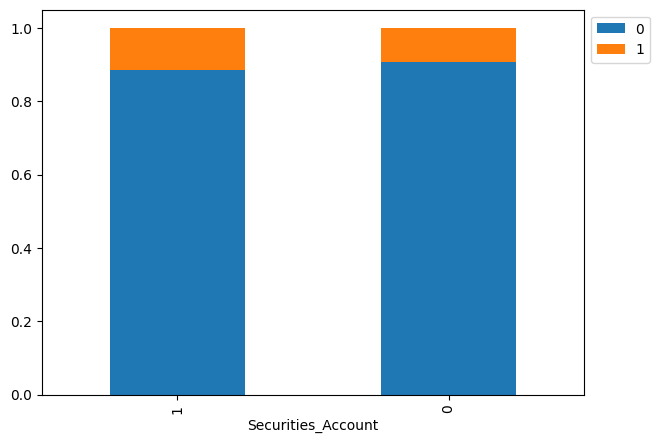

In [65]:
stacked_barplot(data, "Securities_Account", "Personal_Loan")

Observations:
* The vast majority of individuals who did not have a securities account also did not take a personal loan.

**Personal Loan vs. CD Account with Bank**

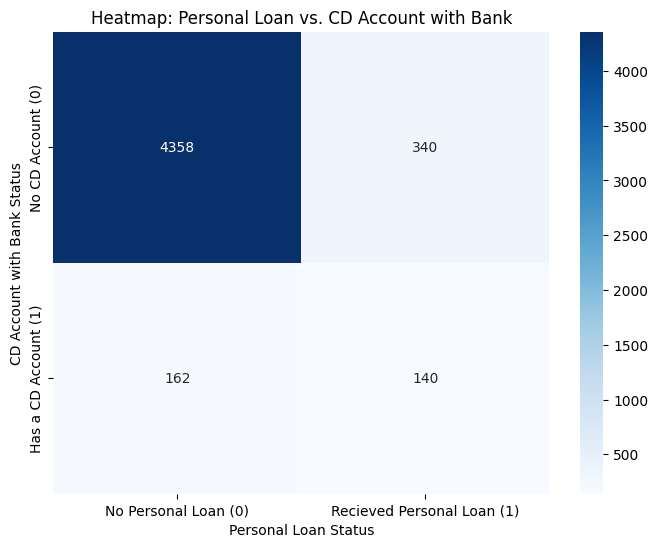

In [66]:
x = data["Personal_Loan"]
y = data["CD_Account"]
cm = confusion_matrix(y, x)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Personal Loan (0)', 'Recieved Personal Loan (1)'], yticklabels=['No CD Account (0)', 'Has a CD Account (1)'])
plt.xlabel('Personal Loan Status')
plt.ylabel('CD Account with Bank Status')
plt.title('Heatmap: Personal Loan vs. CD Account with Bank')
plt.show()

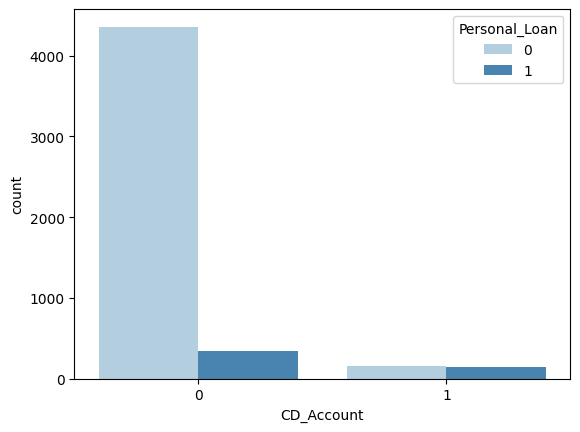

In [67]:
sns.countplot(data=data, x="CD_Account", hue="Personal_Loan", palette='Blues');

Personal_Loan     0    1   All
CD_Account                    
All            4520  480  5000
0              4358  340  4698
1               162  140   302
------------------------------------------------------------------------------------------------------------------------


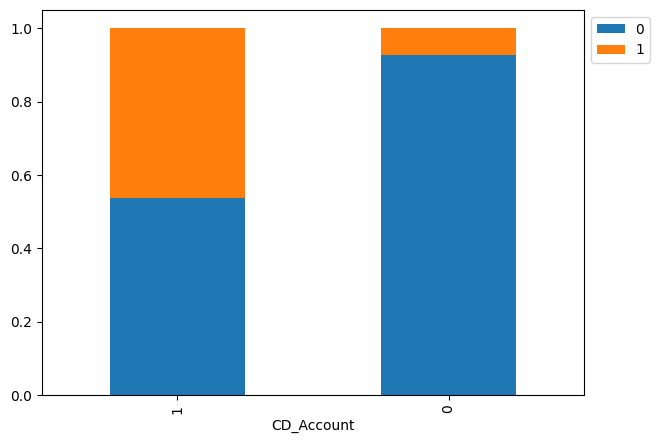

In [68]:
stacked_barplot(data, "CD_Account", "Personal_Loan")

Observations:
* Of those who had a CD account, 46% also took a personal loan.

**Personal Loan vs. Uses Online Banking**

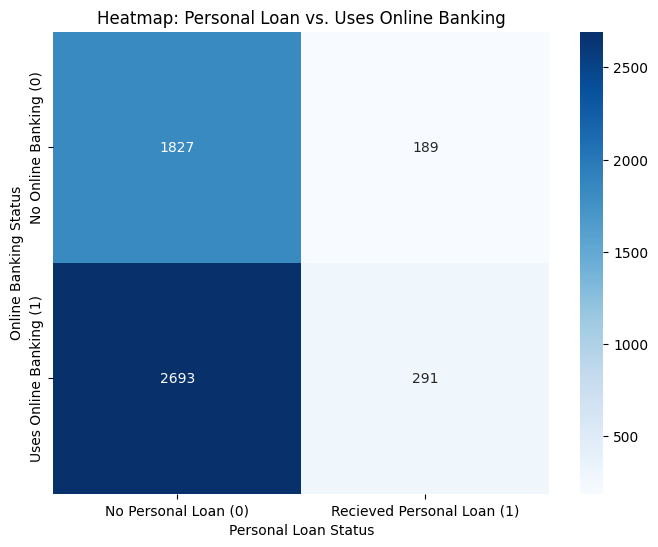

In [69]:
x = data["Personal_Loan"]
y = data["Online"]
cm = confusion_matrix(y, x)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Personal Loan (0)', 'Recieved Personal Loan (1)'], yticklabels=['No Online Banking (0)', 'Uses Online Banking (1)'])
plt.xlabel('Personal Loan Status')
plt.ylabel('Online Banking Status')
plt.title('Heatmap: Personal Loan vs. Uses Online Banking')
plt.show()

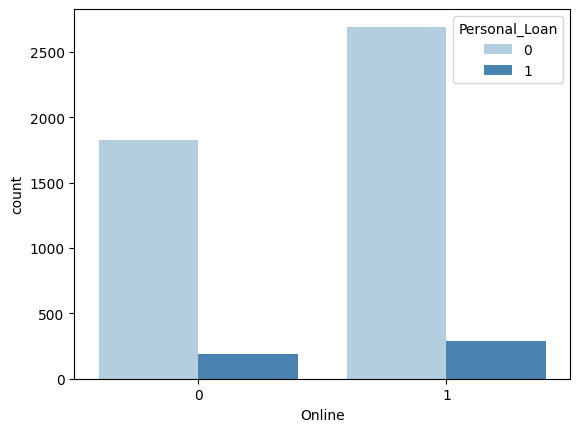

In [70]:
sns.countplot(data=data, x="Online", hue="Personal_Loan", palette='Blues');

Personal_Loan     0    1   All
Online                        
All            4520  480  5000
1              2693  291  2984
0              1827  189  2016
------------------------------------------------------------------------------------------------------------------------


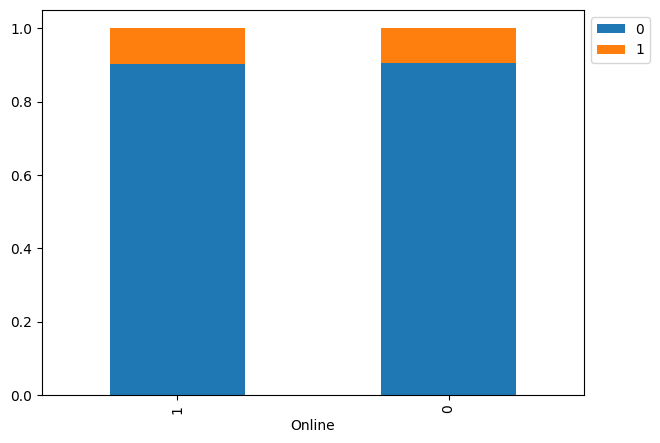

In [71]:
stacked_barplot(data, "Online", "Personal_Loan")

Observations:
* Individuals who used online banking took more loans than those who didn't use online banking.

**Personal Loan vs. Has Credit Card with other bank**

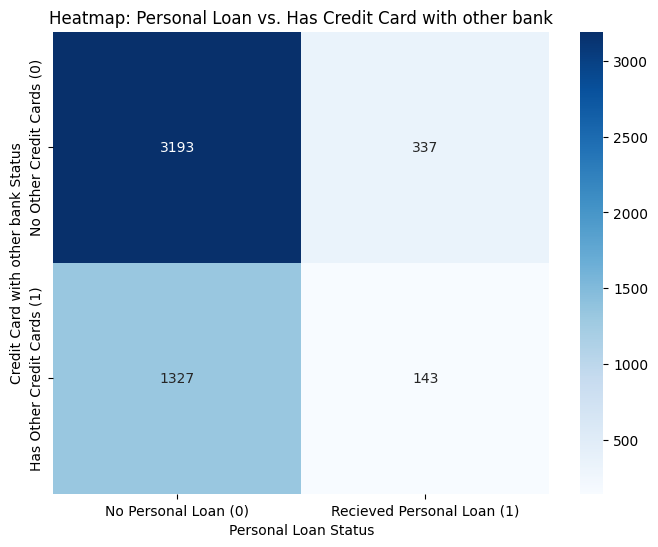

In [72]:
x = data["Personal_Loan"]
y = data["CreditCard"]
cm = confusion_matrix(y, x)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Personal Loan (0)', 'Recieved Personal Loan (1)'], yticklabels=['No Other Credit Cards (0)', 'Has Other Credit Cards (1)'])
plt.xlabel('Personal Loan Status')
plt.ylabel('Credit Card with other bank Status')
plt.title('Heatmap: Personal Loan vs. Has Credit Card with other bank')
plt.show()

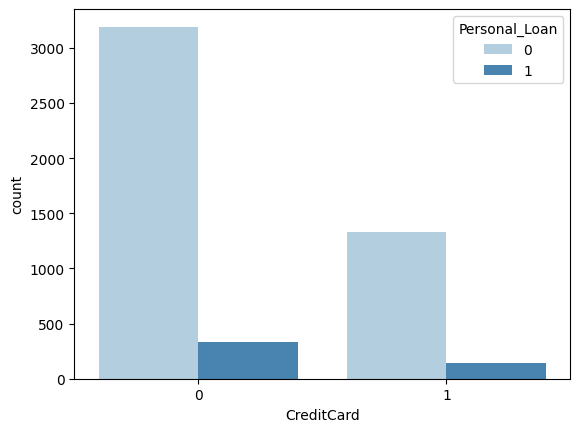

In [73]:
sns.countplot(data=data, x="CreditCard", hue="Personal_Loan", palette='Blues');

Personal_Loan     0    1   All
CreditCard                    
All            4520  480  5000
0              3193  337  3530
1              1327  143  1470
------------------------------------------------------------------------------------------------------------------------


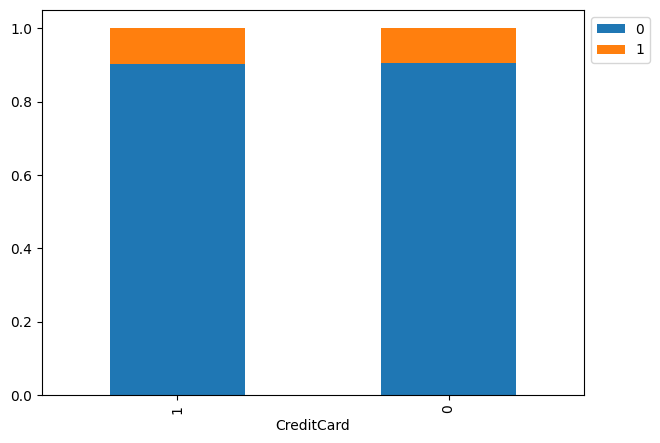

In [74]:
stacked_barplot(data, "CreditCard", "Personal_Loan")

Observations:
* Individuals who had no credit cards with other banks took more than twice the amount of personal loans than individuals who did have credit cards with other banks.

## Data Preprocessing (2 of 2)

There were Outliers in some of the data, particularly in Income, CCAvg, and Mortgage.

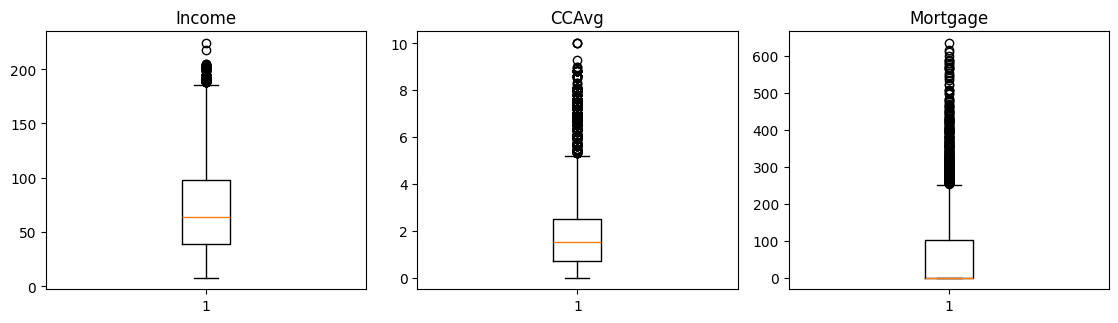

In [75]:
numeric_columns = ['Income', 'CCAvg', 'Mortgage']
plt.figure(figsize=(15, 12))

for i, variable in enumerate(numeric_columns):
    plt.subplot(4, 4, i + 1)
    plt.boxplot(data[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

In [76]:
Q1 = data[numeric_columns].quantile(0.25)
Q3 = data[numeric_columns].quantile(0.75)

IQR = Q3 - Q1

lower = (Q1 - 1.5 * IQR)
upper = Q3 + 1.5 * IQR

In [77]:
((data[numeric_columns] < lower) | (data[numeric_columns] > upper)).sum()/data.shape[0]*100

Income      1.92
CCAvg       6.48
Mortgage    5.82
dtype: float64

In [78]:
data[numeric_columns].describe()

,Income,CCAvg,Mortgage
count,5000.000000,5000.000000,5000.000000
mean,73.774200,1.937938,56.498800
std,46.033729,1.747659,101.713802
min,8.000000,0.000000,0.000000
25%,39.000000,0.700000,0.000000
50%,64.000000,1.500000,0.000000
75%,98.000000,2.500000,101.000000
max,224.000000,10.000000,635.000000


These outliers are genuine and will be kept in the data.

## Model Building - Decision Tree Model

### Model Building

In [79]:
X = data.drop(["Personal_Loan", "Experience"], axis=1)
Y = data["Personal_Loan"]

X = pd.get_dummies(X, columns=["ZIPCode", "Education"], drop_first=True)

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30, random_state=1)

In [80]:
print("Shape of Training set : ", X_train.shape)
print("Shape of test set : ", X_test.shape)
print("Percentage of classes in training set:")
print(y_train.value_counts(normalize=True))
print("Percentage of classes in test set:")
print(y_test.value_counts(normalize=True))

Shape of Training set :  (3500, 17)
Shape of test set :  (1500, 17)
Percentage of classes in training set:
Personal_Loan
0    0.905429
1    0.094571
Name: proportion, dtype: float64
Percentage of classes in test set:
Personal_Loan
0    0.900667
1    0.099333
Name: proportion, dtype: float64


### Functions

In [81]:
def model_performance_classification_sklearn(model, predictors, target):
    pred = model.predict(predictors)
    acc = accuracy_score(target, pred)
    recall = recall_score(target, pred)
    precision = precision_score(target, pred)
    f1 = f1_score(target, pred)
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],)

    return df_perf

In [82]:
def confusion_matrix_sklearn(model, predictors, target):
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

### Building Decision Tree Model

In [83]:
model = DecisionTreeClassifier(criterion="gini", random_state=1)
model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=1)

### Checking Model Performance on Training Set

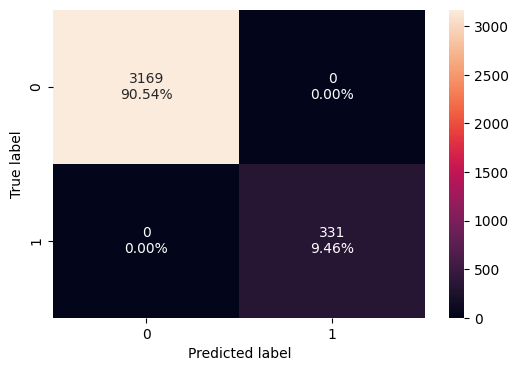

In [84]:
confusion_matrix_sklearn(model, X_train, y_train)

In [85]:
decision_tree_perf_train = model_performance_classification_sklearn(
    model, X_train, y_train
)
decision_tree_perf_train

,Accuracy,Recall,Precision,F1
0,1.0,1.0,1.0,1.0


### Checking Model Performance on Test Set

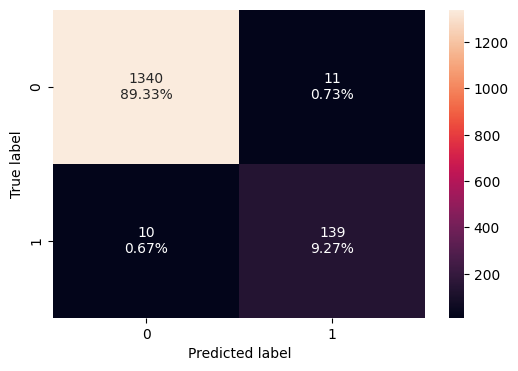

In [86]:
confusion_matrix_sklearn(model, X_test, y_test)

In [87]:
decision_tree_perf_test = model_performance_classification_sklearn(
    model, X_test, y_test
)
decision_tree_perf_test

,Accuracy,Recall,Precision,F1
0,0.986,0.932886,0.926667,0.929766


* The model is giving high scores across all metrics and generalized results on the training and test set.

### Visualizing the Decision Tree

In [88]:
feature_names = list(X_train.columns)
print(feature_names)

['Age', 'Income', 'Family', 'CCAvg', 'Mortgage', 'Securities_Account', 'CD_Account', 'Online', 'CreditCard', 'ZIPCode_91', 'ZIPCode_92', 'ZIPCode_93', 'ZIPCode_94', 'ZIPCode_95', 'ZIPCode_96', 'Education_2', 'Education_3']


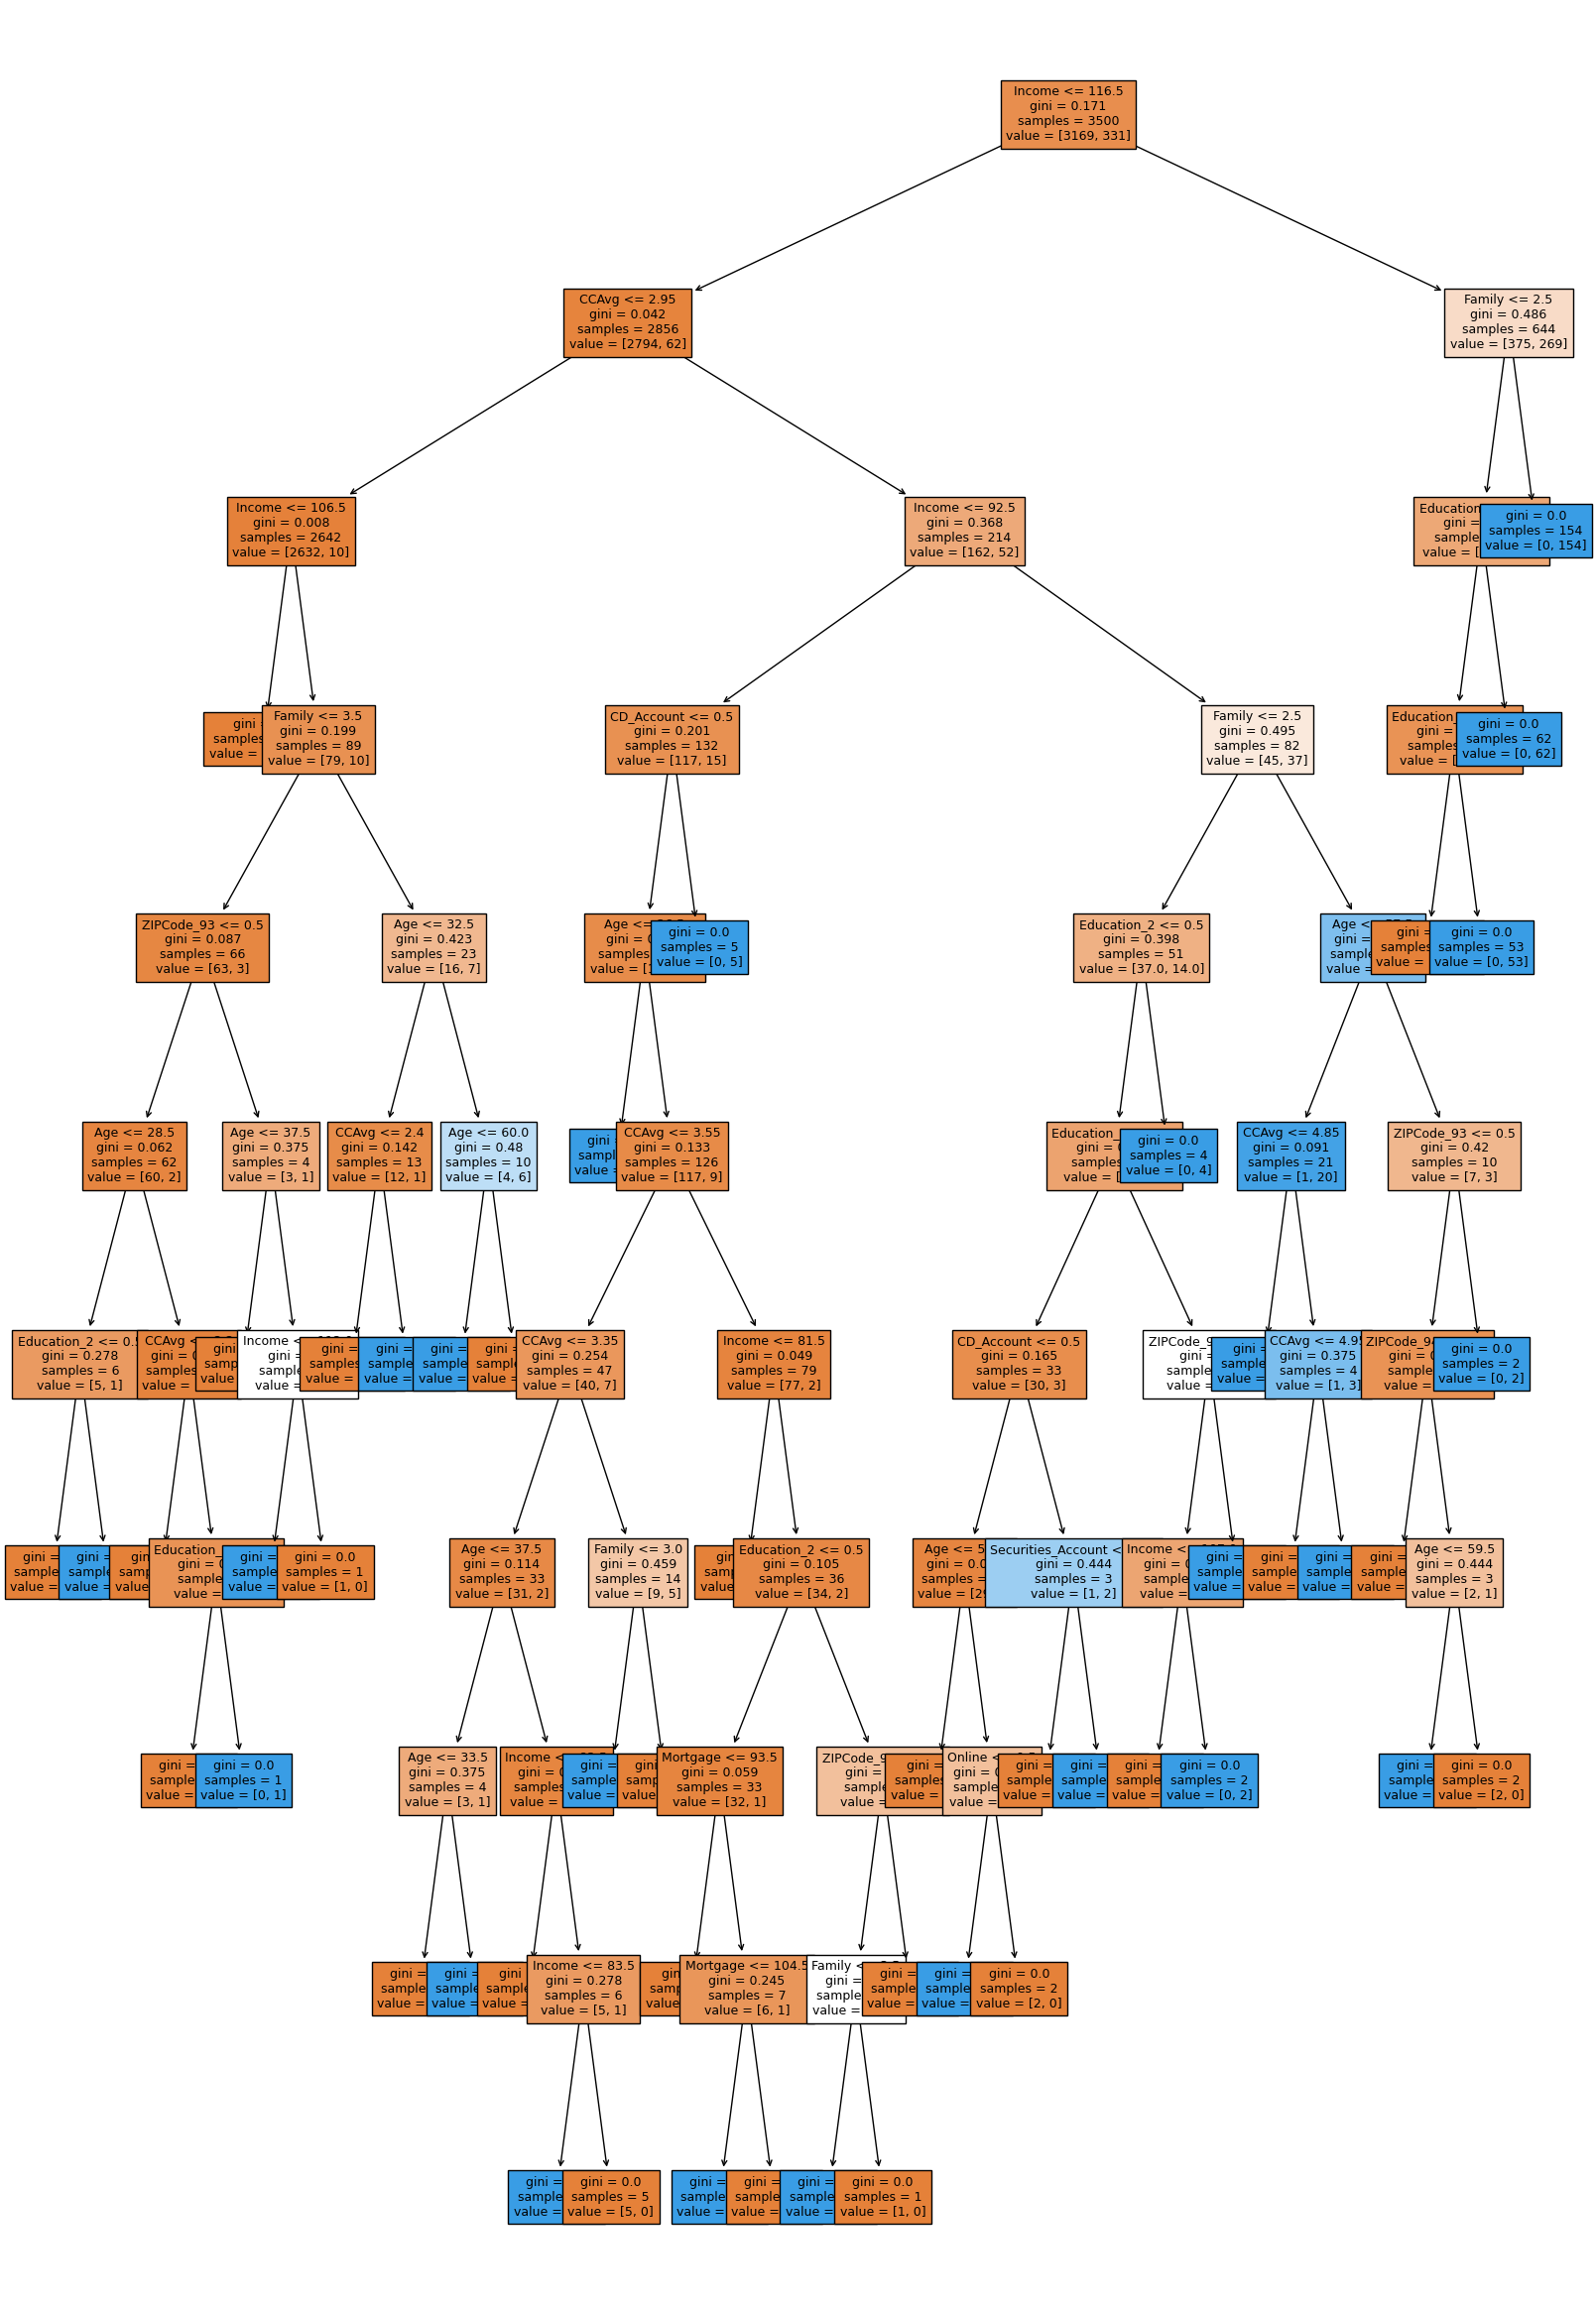

In [89]:
plt.figure(figsize=(20, 30))
out = tree.plot_tree(
    model,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,)
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

In [90]:
print(tree.export_text(model, feature_names=feature_names, show_weights=True))

|--- Income <= 116.50
|   |--- CCAvg <= 2.95
|   |   |--- Income <= 106.50
|   |   |   |--- weights: [2553.00, 0.00] class: 0
|   |   |--- Income >  106.50
|   |   |   |--- Family <= 3.50
|   |   |   |   |--- ZIPCode_93 <= 0.50
|   |   |   |   |   |--- Age <= 28.50
|   |   |   |   |   |   |--- Education_2 <= 0.50
|   |   |   |   |   |   |   |--- weights: [5.00, 0.00] class: 0
|   |   |   |   |   |   |--- Education_2 >  0.50
|   |   |   |   |   |   |   |--- weights: [0.00, 1.00] class: 1
|   |   |   |   |   |--- Age >  28.50
|   |   |   |   |   |   |--- CCAvg <= 2.20
|   |   |   |   |   |   |   |--- weights: [48.00, 0.00] class: 0
|   |   |   |   |   |   |--- CCAvg >  2.20
|   |   |   |   |   |   |   |--- Education_3 <= 0.50
|   |   |   |   |   |   |   |   |--- weights: [7.00, 0.00] class: 0
|   |   |   |   |   |   |   |--- Education_3 >  0.50
|   |   |   |   |   |   |   |   |--- weights: [0.00, 1.00] class: 1
|   |   |   |   |--- ZIPCode_93 >  0.50
|   |   |   |   |   |--- Age <= 37.50

In [91]:
print(pd.DataFrame(
        model.feature_importances_, columns=["Imp"], index=X_train.columns
    ).sort_values(by="Imp", ascending=False))

                         Imp
Income              0.308098
Family              0.259255
Education_2         0.166192
Education_3         0.147127
CCAvg               0.048798
Age                 0.033150
CD_Account          0.017273
ZIPCode_94          0.007183
ZIPCode_93          0.004682
Mortgage            0.003236
Online              0.002224
Securities_Account  0.002224
ZIPCode_91          0.000556
ZIPCode_92          0.000000
ZIPCode_95          0.000000
ZIPCode_96          0.000000
CreditCard          0.000000


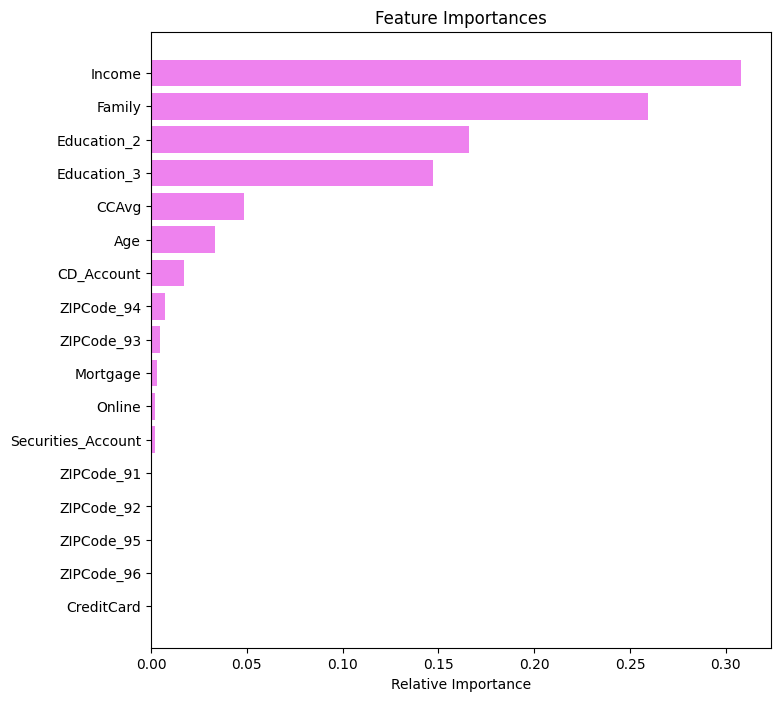

In [92]:
importances = model.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(8, 8))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

* Income, family size, and level of education are the top 3 important features.

## Model Building - Performance Improvement

### Pre-Pruning

In [93]:
estimator = DecisionTreeClassifier(random_state=1)
parameters = {
    "max_depth": np.arange(6, 15),
    "min_samples_leaf": [1, 2, 5, 7, 10],
    "max_leaf_nodes": [2, 3, 5, 10],}

acc_scorer = make_scorer(recall_score)

grid_obj = GridSearchCV(estimator, parameters, scoring=acc_scorer, cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

estimator = grid_obj.best_estimator_

estimator.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=10, min_samples_leaf=10,
                       random_state=1)

### Checking performance on Training Set

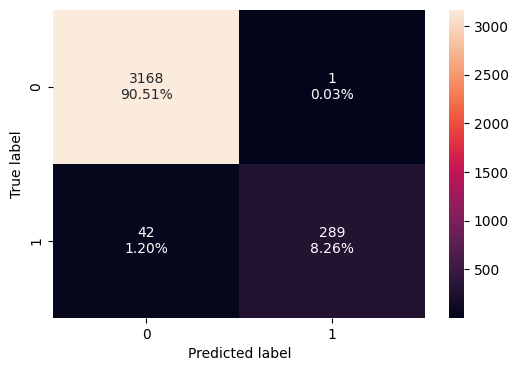

In [94]:
confusion_matrix_sklearn(estimator, X_train, y_train)

In [95]:
decision_tree_tune_perf_train = model_performance_classification_sklearn(estimator, X_train, y_train)
decision_tree_tune_perf_train

,Accuracy,Recall,Precision,F1
0,0.987714,0.873112,0.996552,0.930757


### Checking performance on Test Set

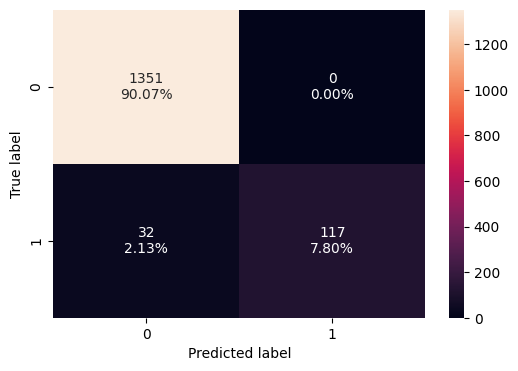

In [96]:
confusion_matrix_sklearn(estimator, X_test, y_test)

In [97]:
decision_tree_tune_perf_test = model_performance_classification_sklearn(estimator, X_test, y_test)
decision_tree_tune_perf_test

,Accuracy,Recall,Precision,F1
0,0.978667,0.785235,1.0,0.879699


### Visualizing the Decision Tree

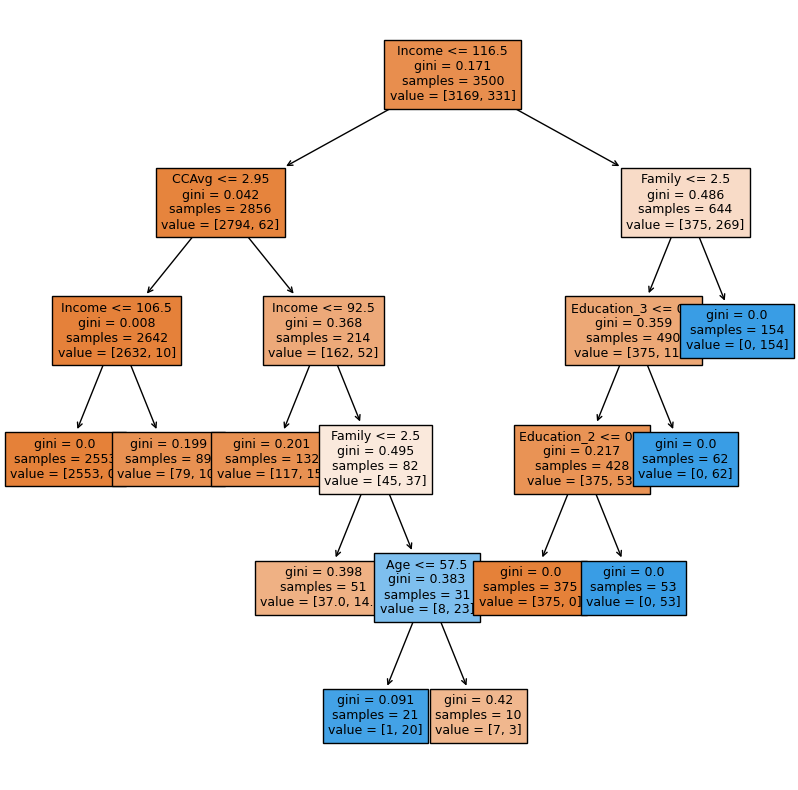

In [98]:
plt.figure(figsize=(10, 10))
out = tree.plot_tree(
    estimator,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,)
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

In [99]:
print(tree.export_text(estimator, feature_names=feature_names, show_weights=True))

|--- Income <= 116.50
|   |--- CCAvg <= 2.95
|   |   |--- Income <= 106.50
|   |   |   |--- weights: [2553.00, 0.00] class: 0
|   |   |--- Income >  106.50
|   |   |   |--- weights: [79.00, 10.00] class: 0
|   |--- CCAvg >  2.95
|   |   |--- Income <= 92.50
|   |   |   |--- weights: [117.00, 15.00] class: 0
|   |   |--- Income >  92.50
|   |   |   |--- Family <= 2.50
|   |   |   |   |--- weights: [37.00, 14.00] class: 0
|   |   |   |--- Family >  2.50
|   |   |   |   |--- Age <= 57.50
|   |   |   |   |   |--- weights: [1.00, 20.00] class: 1
|   |   |   |   |--- Age >  57.50
|   |   |   |   |   |--- weights: [7.00, 3.00] class: 0
|--- Income >  116.50
|   |--- Family <= 2.50
|   |   |--- Education_3 <= 0.50
|   |   |   |--- Education_2 <= 0.50
|   |   |   |   |--- weights: [375.00, 0.00] class: 0
|   |   |   |--- Education_2 >  0.50
|   |   |   |   |--- weights: [0.00, 53.00] class: 1
|   |   |--- Education_3 >  0.50
|   |   |   |--- weights: [0.00, 62.00] class: 1
|   |--- Family >  2.

In [100]:
print(pd.DataFrame(
        estimator.feature_importances_, columns=["Imp"], index=X_train.columns
    ).sort_values(by="Imp", ascending=False))

                         Imp
Income              0.337681
Family              0.275581
Education_2         0.175687
Education_3         0.157286
CCAvg               0.042856
Age                 0.010908
CD_Account          0.000000
Online              0.000000
Securities_Account  0.000000
ZIPCode_91          0.000000
ZIPCode_92          0.000000
ZIPCode_93          0.000000
ZIPCode_94          0.000000
ZIPCode_95          0.000000
ZIPCode_96          0.000000
Mortgage            0.000000
CreditCard          0.000000


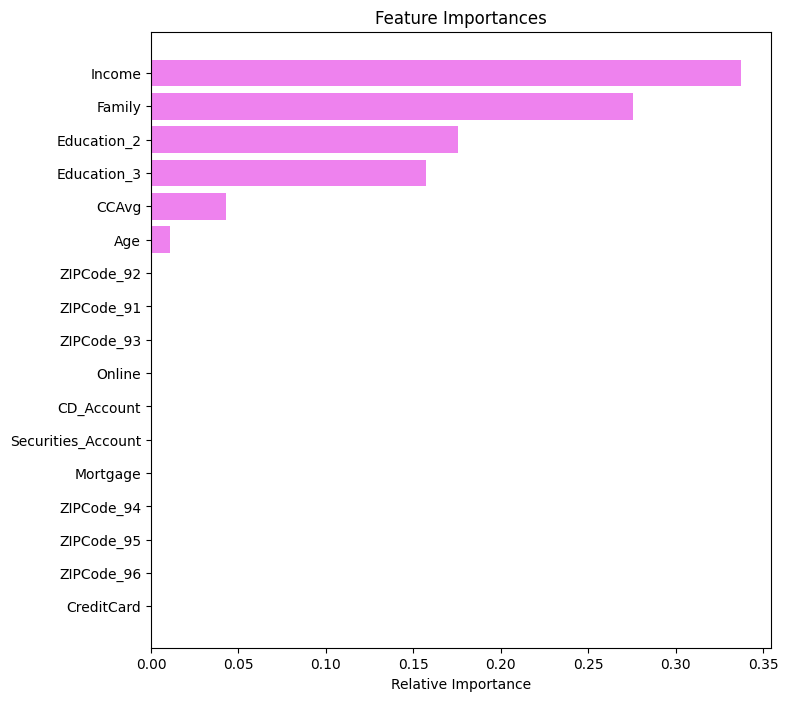

In [101]:
importances = estimator.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(8, 8))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

* The top 3 important features maintained their order of importance.

### Cost Complexity Pruning

In [102]:
clf = DecisionTreeClassifier(random_state=1)
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

In [103]:
pd.DataFrame(path)

,ccp_alphas,impurities
0,0.000000,0.000000
1,0.000186,0.001114
2,0.000214,0.001542
3,0.000242,0.002750
4,0.000250,0.003250
5,0.000268,0.004324
6,0.000272,0.004868
7,0.000276,0.005420
8,0.000381,0.005801
9,0.000527,0.006329


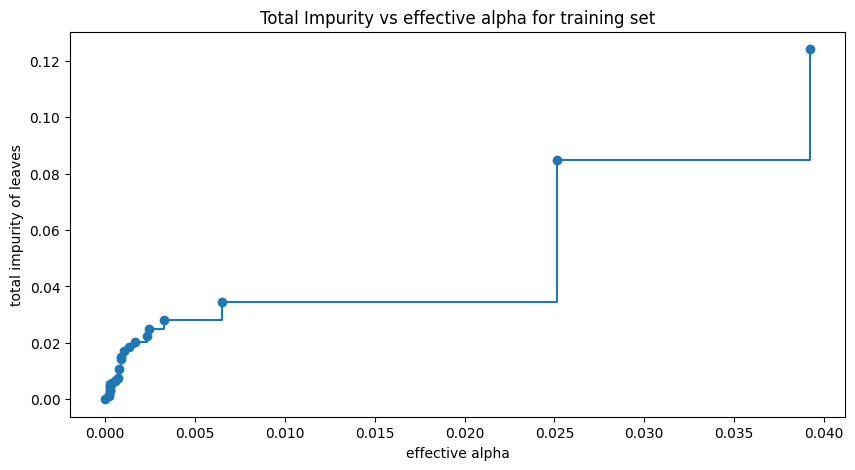

In [104]:
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(ccp_alphas[:-1], impurities[:-1], marker="o", drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")
plt.show()

In [105]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=1, ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)
print(
    "Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
        clfs[-1].tree_.node_count, ccp_alphas[-1]
    )
)

Number of nodes in the last tree is: 1 with ccp_alpha: 0.04708834100596766


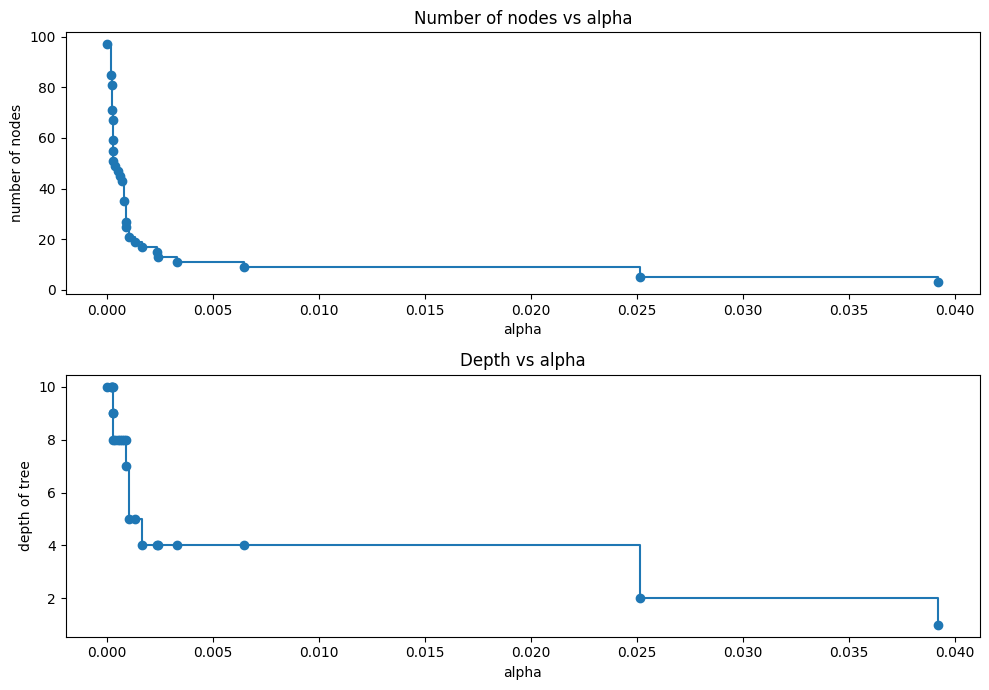

In [106]:
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots(2, 1, figsize=(10, 7))
ax[0].plot(ccp_alphas, node_counts, marker="o", drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker="o", drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

### Recall vs Alpha for Training and Testing Sets

In [107]:
recall_train = []
for clf in clfs:
    pred_train = clf.predict(X_train)
    values_train = recall_score(y_train, pred_train)
    recall_train.append(values_train)

recall_test = []
for clf in clfs:
    pred_test = clf.predict(X_test)
    values_test = recall_score(y_test, pred_test)
    recall_test.append(values_test)

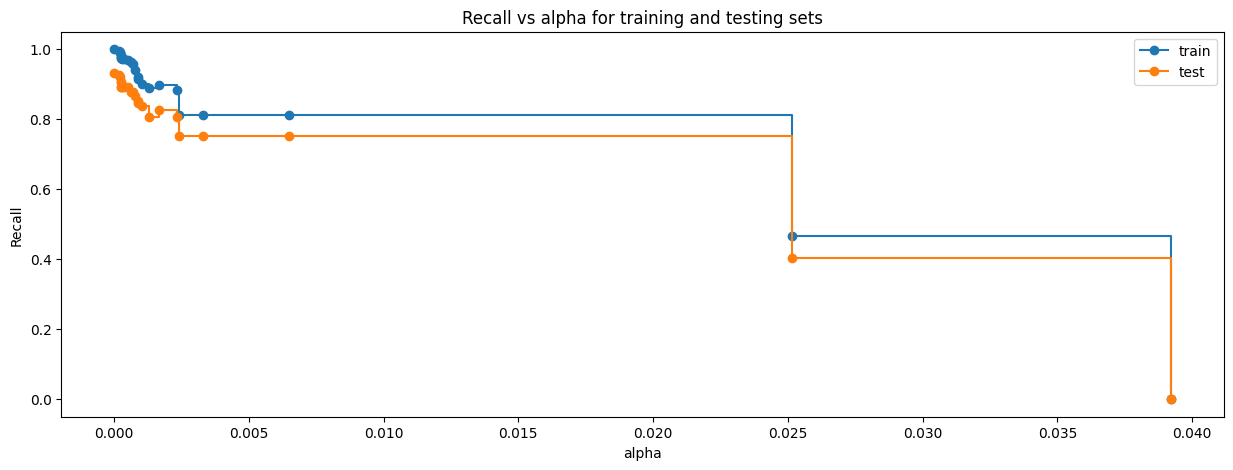

In [108]:
fig, ax = plt.subplots(figsize=(15, 5))
ax.set_xlabel("alpha")
ax.set_ylabel("Recall")
ax.set_title("Recall vs alpha for training and testing sets")
ax.plot(ccp_alphas, recall_train, marker="o", label="train", drawstyle="steps-post")
ax.plot(ccp_alphas, recall_test, marker="o", label="test", drawstyle="steps-post")
ax.legend()
plt.show()

In [109]:
index_best_model = np.argmax(recall_test)
best_model = clfs[index_best_model]
print(best_model)

DecisionTreeClassifier(random_state=1)


In [110]:
print("ccp_alpha value of the best model:", best_model.ccp_alpha)

ccp_alpha value of the best model: 0.0


### Post Pruning

In [111]:
estimator_2 = DecisionTreeClassifier(ccp_alpha=0.006473, class_weight={0: 0.15, 1: 0.85}, random_state=1)
estimator_2.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.006473, class_weight={0: 0.15, 1: 0.85},
                       random_state=1)

### Checking Performance on Training Data

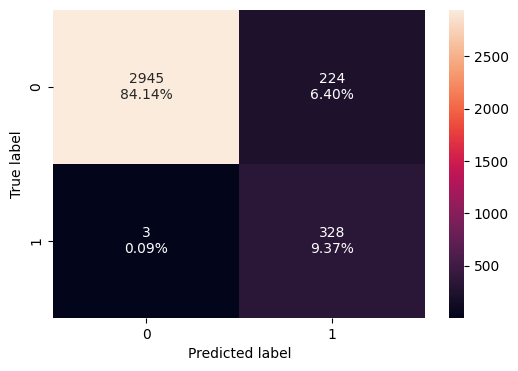

In [112]:
confusion_matrix_sklearn(estimator_2, X_train, y_train)

In [113]:
decision_tree_tune_post_train = model_performance_classification_sklearn(
    estimator_2, X_train, y_train
)
decision_tree_tune_post_train

,Accuracy,Recall,Precision,F1
0,0.935143,0.990937,0.594203,0.742922


### Checking Performance on Testing Data

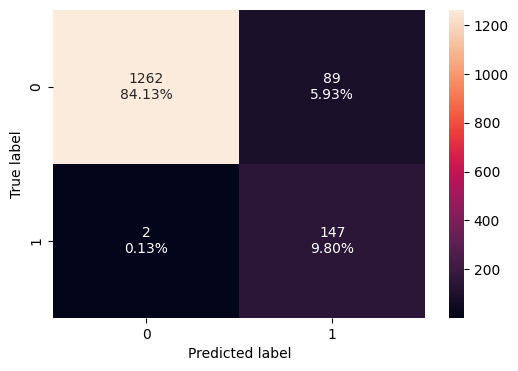

In [114]:
confusion_matrix_sklearn(estimator_2, X_test, y_test)

In [115]:
decision_tree_tune_post_test = model_performance_classification_sklearn(
    estimator_2, X_test, y_test
)
decision_tree_tune_post_test

,Accuracy,Recall,Precision,F1
0,0.939333,0.986577,0.622881,0.763636


### Visualizing the Decision Tree

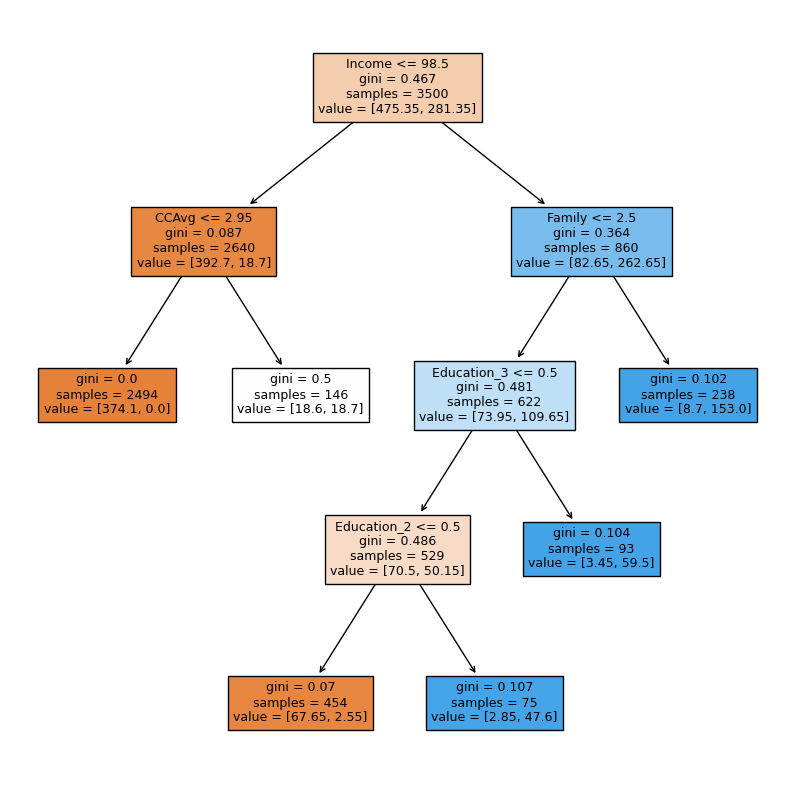

In [116]:
plt.figure(figsize=(10, 10))
out = tree.plot_tree(
    estimator_2,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,)
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

In [117]:
print(tree.export_text(estimator_2, feature_names=feature_names, show_weights=True))

|--- Income <= 98.50
|   |--- CCAvg <= 2.95
|   |   |--- weights: [374.10, 0.00] class: 0
|   |--- CCAvg >  2.95
|   |   |--- weights: [18.60, 18.70] class: 1
|--- Income >  98.50
|   |--- Family <= 2.50
|   |   |--- Education_3 <= 0.50
|   |   |   |--- Education_2 <= 0.50
|   |   |   |   |--- weights: [67.65, 2.55] class: 0
|   |   |   |--- Education_2 >  0.50
|   |   |   |   |--- weights: [2.85, 47.60] class: 1
|   |   |--- Education_3 >  0.50
|   |   |   |--- weights: [3.45, 59.50] class: 1
|   |--- Family >  2.50
|   |   |--- weights: [8.70, 153.00] class: 1



In [118]:
print(pd.DataFrame(
        estimator_2.feature_importances_, columns=["Imp"], index=X_train.columns
    ).sort_values(by="Imp", ascending=False))

                         Imp
Income              0.636860
Education_2         0.160224
Education_3         0.076930
Family              0.069445
CCAvg               0.056541
ZIPCode_92          0.000000
ZIPCode_96          0.000000
ZIPCode_95          0.000000
ZIPCode_94          0.000000
ZIPCode_93          0.000000
Age                 0.000000
ZIPCode_91          0.000000
Online              0.000000
CD_Account          0.000000
Securities_Account  0.000000
Mortgage            0.000000
CreditCard          0.000000


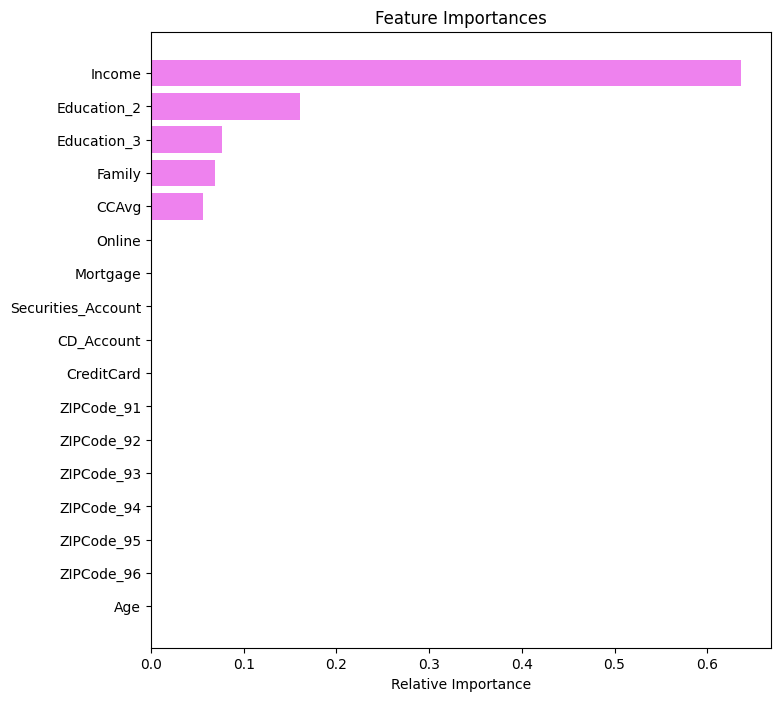

In [119]:
importances = estimator_2.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(8, 8))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

## Comparison of Models and Final Model Selection

In [120]:
models_train_comp_df = pd.concat(
    [decision_tree_perf_train.T, decision_tree_tune_perf_train.T, decision_tree_tune_post_train.T], axis=1,
)
models_train_comp_df.columns = ["Decision Tree sklearn", "Decision Tree (Pre-Pruning)", "Decision Tree (Post-Pruning)"]
print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,Decision Tree sklearn,Decision Tree (Pre-Pruning),Decision Tree (Post-Pruning)
Accuracy,1.0,0.987714,0.935143
Recall,1.0,0.873112,0.990937
Precision,1.0,0.996552,0.594203
F1,1.0,0.930757,0.742922


In [121]:
models_test_comp_df = pd.concat(
    [decision_tree_perf_test.T, decision_tree_tune_perf_test.T, decision_tree_tune_post_test.T], axis=1,
)
models_test_comp_df.columns = ["Decision Tree sklearn", "Decision Tree (Pre-Pruning)", "Decision Tree (Post-Pruning)"]
print("Training performance comparison:")
models_test_comp_df

Training performance comparison:


,Decision Tree sklearn,Decision Tree (Pre-Pruning),Decision Tree (Post-Pruning)
Accuracy,0.986000,0.978667,0.939333
Recall,0.932886,0.785235,0.986577
Precision,0.926667,1.000000,0.622881
F1,0.929766,0.879699,0.763636


## Conclusions and Recommendations

* The decision tree with post-pruning is giving the highest recall on the test set.
* The tree with post pruning is not complex and is easy to interpret.
* The model can be used to correctly identify individuals who will take out a personal loan 98.6% of the time.
* The bank should collect data on family size and education level early on as families of 3 or more, and those with advanced or professional education are more likely to take out loans.
* The bank should study what leads individuals to open a CD account and should target those who already have CD accounts with offers for personal loans as 46% of individuals who had a CD also took out a personal loan.
* Individuals who had no credit cards with other banks took more than twice the amount of personal loans than individuals who did have credit cards with other banks - for this reason, the bank should advertise personal loans to those who are only card holders with their bank.
* Individuals who took out loans had higher incomes on average - the bank should target individuals above a certain income threshold for personal loans.
* The bank should source data and target promotions at families of 3 or more above a certain income level who hold advanced or professional degrees. Families who meet these three areas and who also use online banking or already have CDs are highly likely to take out personal loans.